In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [5]:
def small_world_network(N, Z, p):
    G = nx.Graph()
    
    # Adicionando nós
    for i in range(N):
        G.add_node(i)
    
    # Adicionando arestas curtas
    for i in range(N):
        for j in range(1, Z//2 + 1):
            G.add_edge(i, (i+j) % N)
            G.add_edge(i, (i-j) % N)
    
    # Adicionando atalhos aleatórios
    num_shortcuts = int(p * N * Z // 2)
    attempts = 0
    added_shortcuts = 0
    while added_shortcuts < num_shortcuts and attempts < num_shortcuts * 10:
        u = random.randint(0, N-1)
        v = random.randint(0, N-1)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
            added_shortcuts += 1
        attempts += 1
    
    return G


### Aqui podemos agora definir os parâmetros dinamicamente para a função.
##### N = Número de Nós
##### Z = Número de Arestas Curtas
##### p = Probabilidade de Atalhos

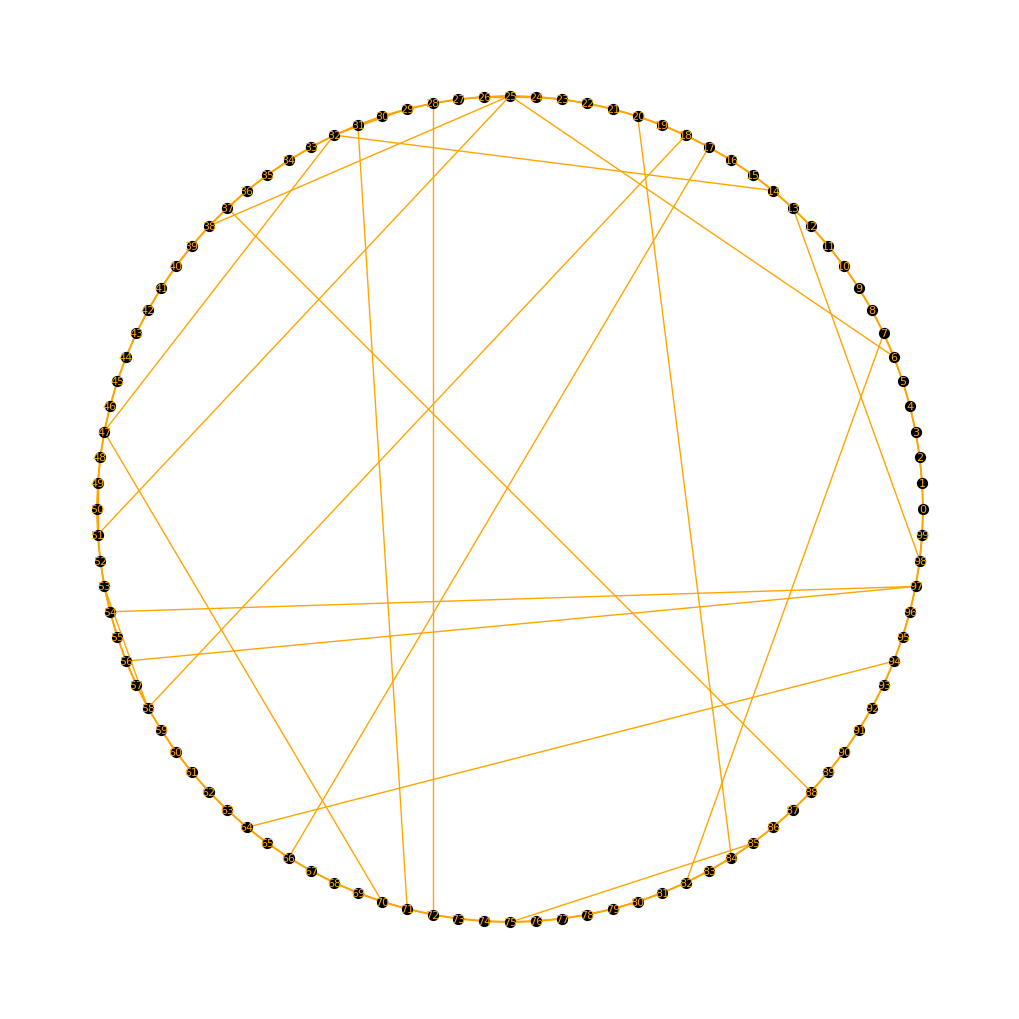

In [6]:
N = 100
Z = 4
p = 0.1
G = small_world_network(N, Z, p)
plt.figure(figsize=(10, 10))

# Para ficar bonito
nx.draw_circular(
    G,
    with_labels=True,
    node_size=50,
    node_color='black',
    edge_color='orange',
    font_size=8,
    font_color='orange'
)

plt.show()

##### Optei por essa forma de visualização para facilitar a compreensão do plot, pois a original estava pequena e embolada

In [7]:

def find_path_lengths_from_node(graph, node):
    # Calcula os comprimentos dos caminhos mais curtos do nó fornecido para todos os outros nós no grafo
    lengths = nx.single_source_shortest_path_length(graph, node)
    # Retorna um dicionário onde as chaves são os nós de destino e os valores são os comprimentos dos caminhos
    return lengths

In [8]:
# Função para encontrar os comprimentos de todos os caminhos mais curtos no grafo
def find_all_path_lengths(graph):
    # Inicializa uma lista para armazenar todos os comprimentos dos caminhos
    all_lengths = []
    # Itera sobre todos os nós do grafo, com uma barra de progresso para acompanhar o progresso
    for node in tqdm(graph.nodes(), desc="Calculando os comprimentos dos caminhos a partir de cada nó"):
        # Encontra os comprimentos dos caminhos a partir do nó atual
        lengths = find_path_lengths_from_node(graph, node)
        # Adiciona todos os comprimentos dos caminhos encontrados à lista all_lengths
        all_lengths.extend(lengths.values())
    # Retorna a lista contendo todos os comprimentos dos caminhos
    return all_lengths

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 13494.75it/s]


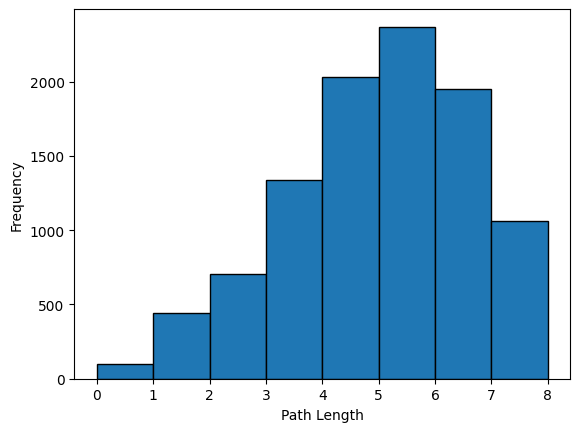

In [9]:
all_path_lengths = find_all_path_lengths(G)
plt.hist(all_path_lengths, bins=range(max(all_path_lengths)+1), edgecolor='black')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
def find_average_path_length(graph):
    return nx.average_shortest_path_length(graph)

In [11]:
avg_path_length = find_average_path_length(G)
print(f'Average path length: {avg_path_length}')

Average path length: 4.563232323232323


In [12]:
def plot_average_path_length_vs_p(N, Z):
    p_values = [10**i for i in range(-3, 4)]
    d_p0 = find_average_path_length(small_world_network(N, Z, 0))
    average_lengths = []

    for p in tqdm(p_values, desc="Calculating average path lengths for different p values"):
        G = small_world_network(N, Z, p)
        avg_length = find_average_path_length(G)
        average_lengths.append(avg_length / d_p0)

    plt.semilogx(p_values, average_lengths, marker='o')
    plt.xlabel('p')
    plt.ylabel('Average Path Length / d(p=0)')
    plt.title(f'N={N}, Z={Z}')
    plt.grid(True)
    plt.show()

Calculating average path lengths for different p values: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


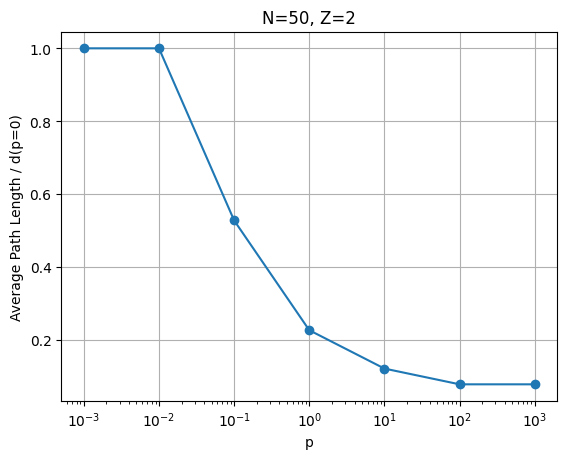

In [13]:
plot_average_path_length_vs_p(50, 2)

### Experimentos

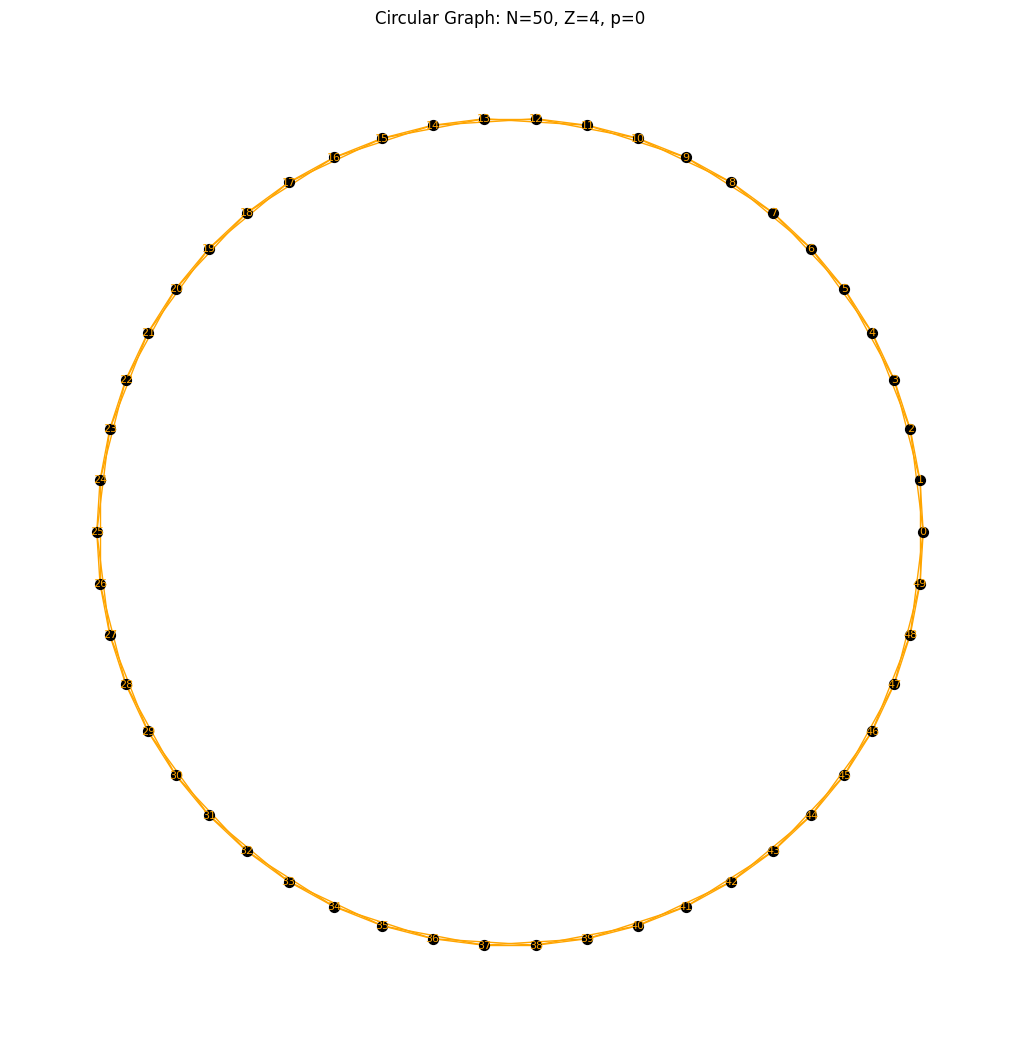

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 34940.89it/s]


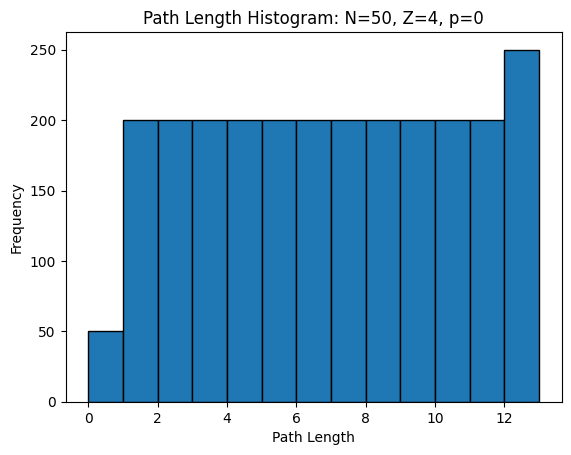

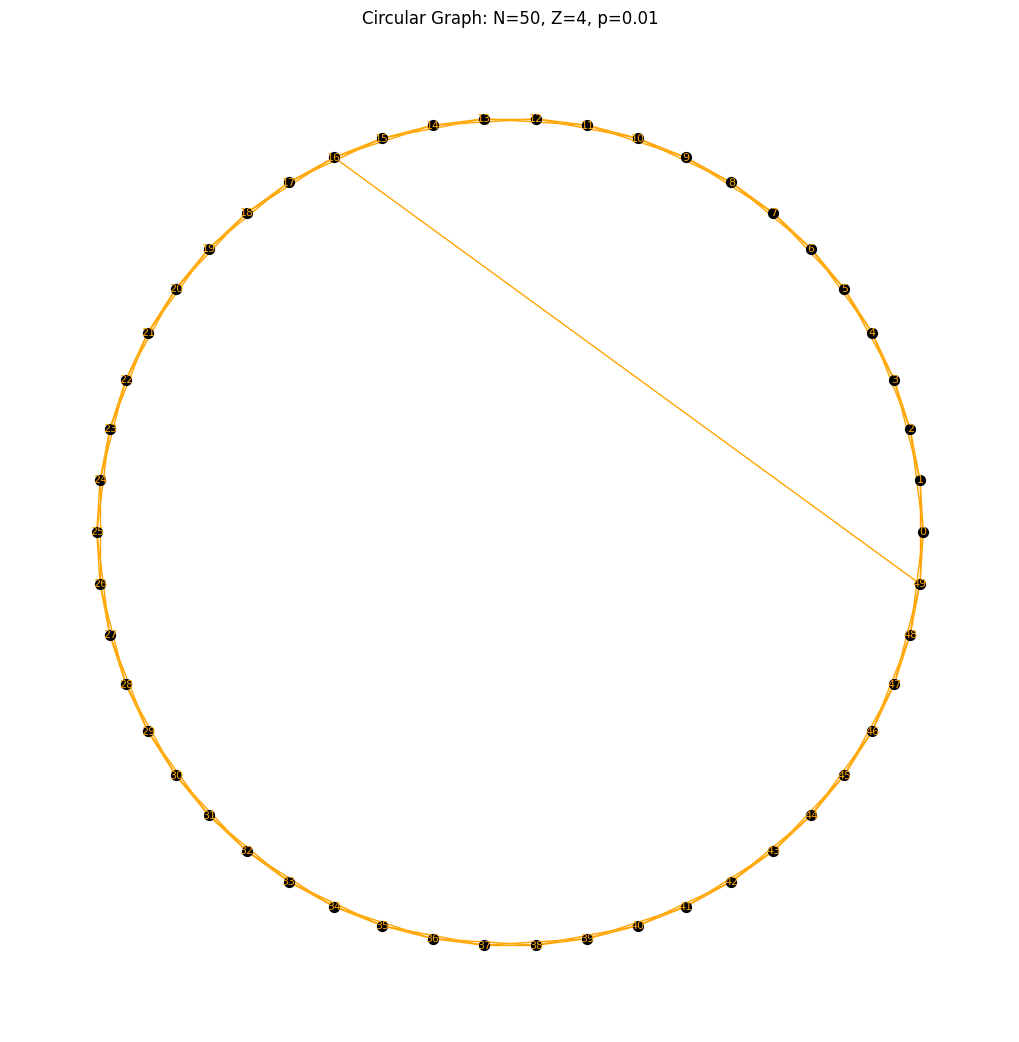

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 39516.71it/s]


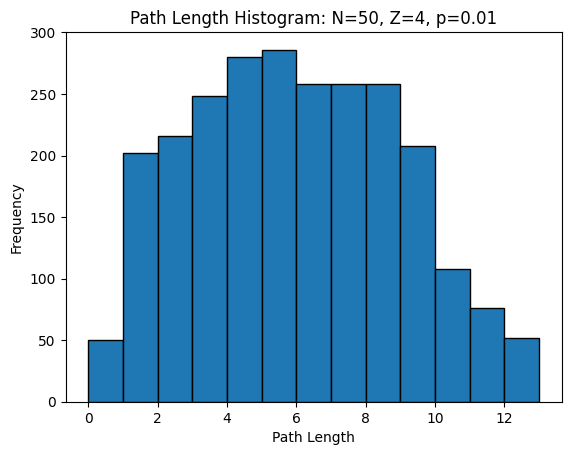

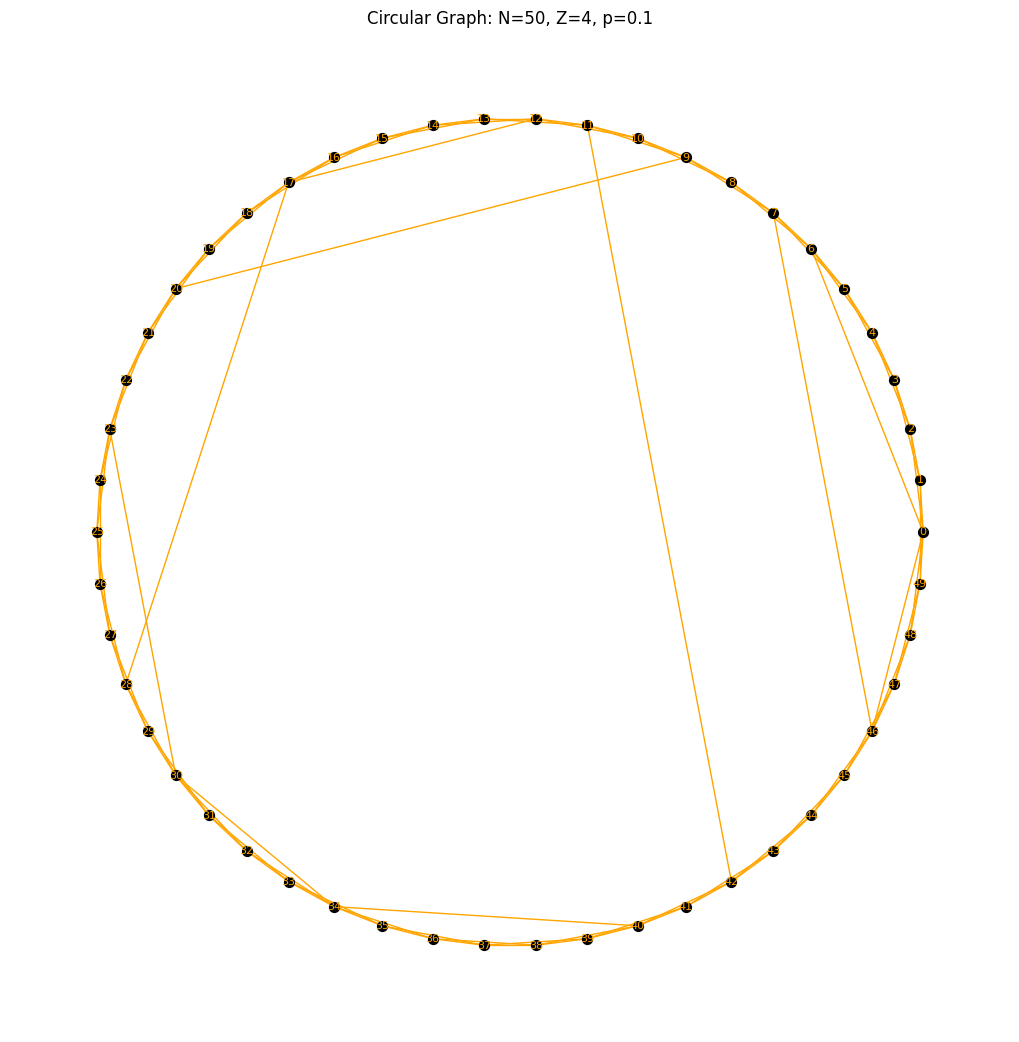

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 46121.66it/s]


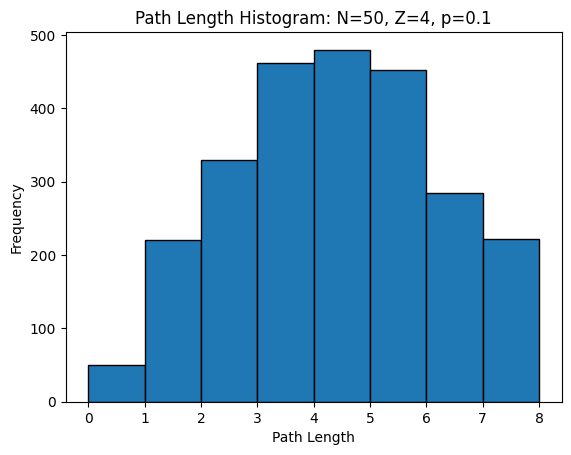

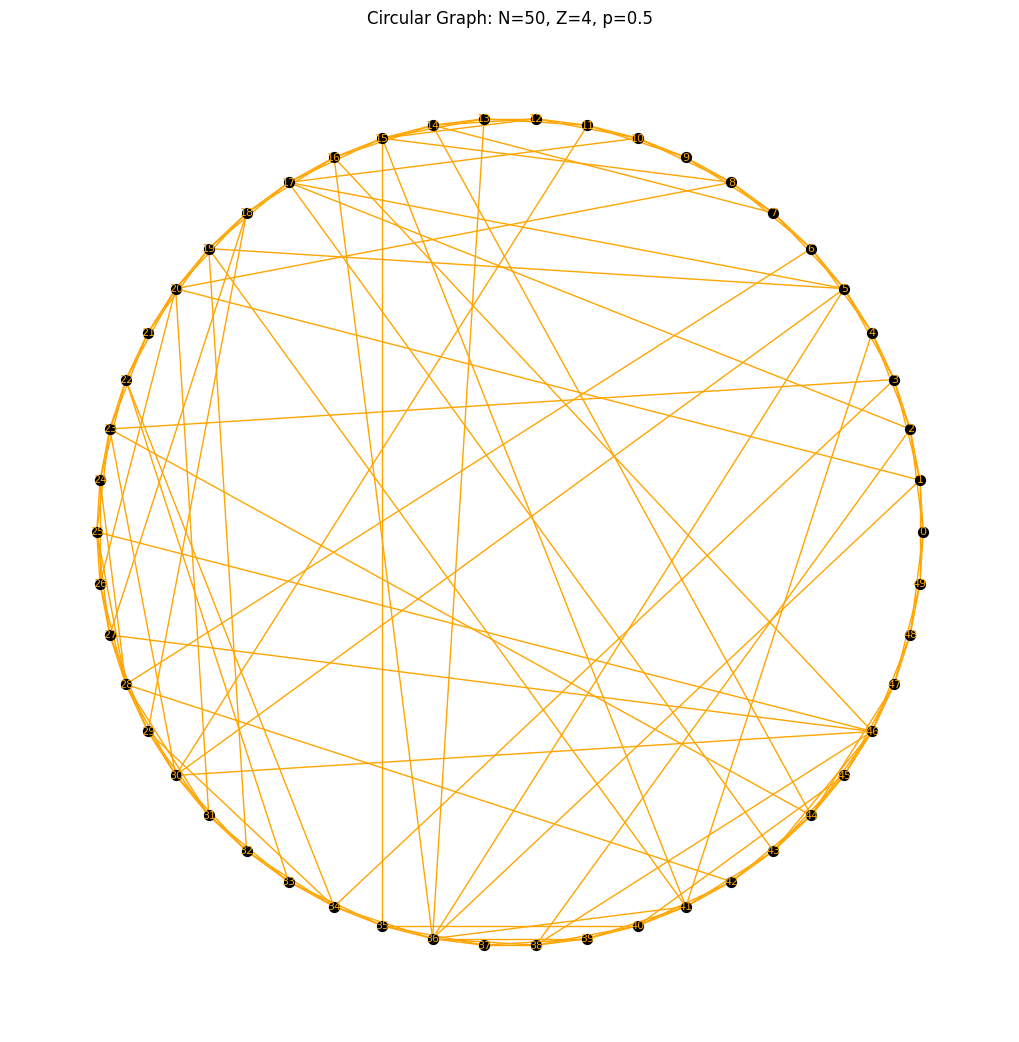

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 48121.89it/s]


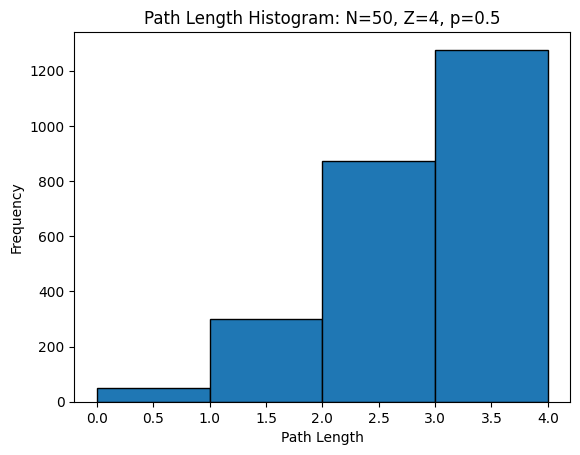

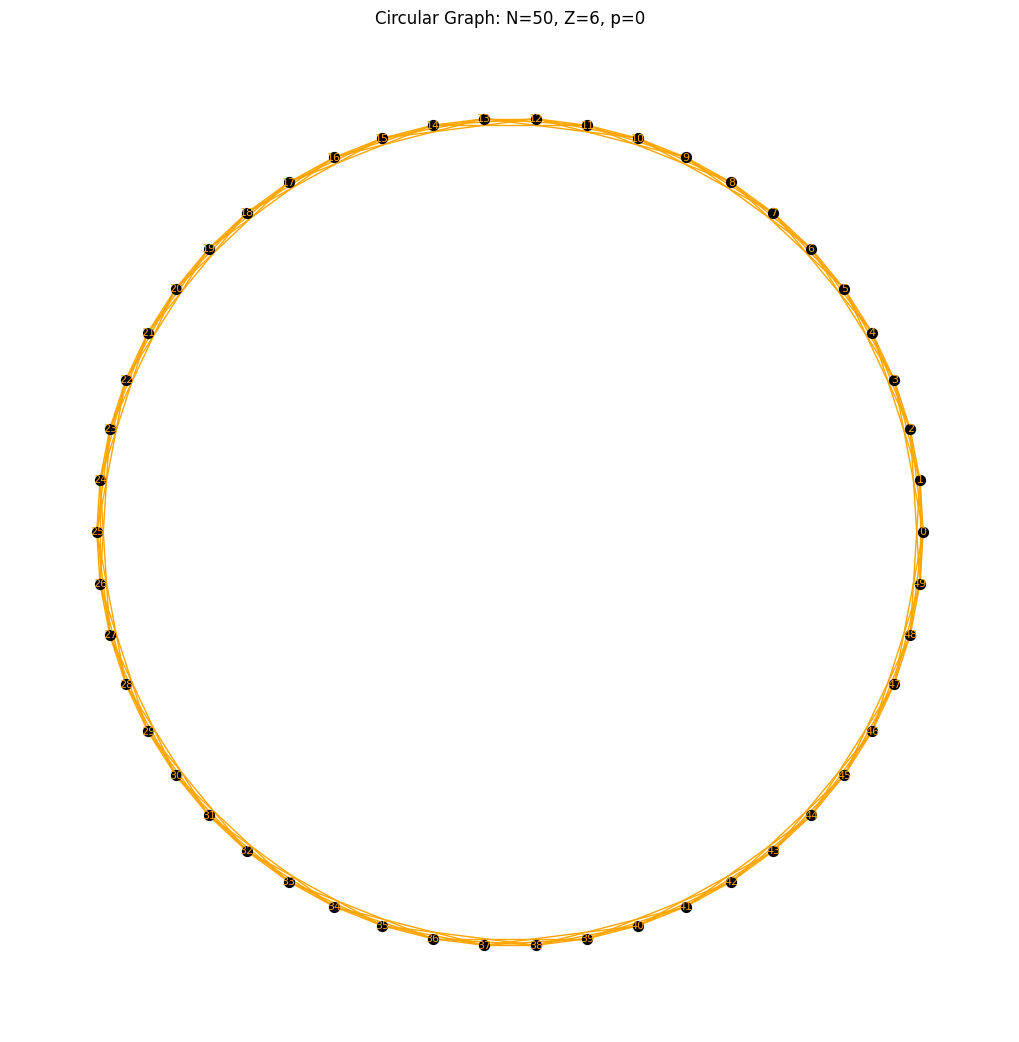

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 41809.25it/s]


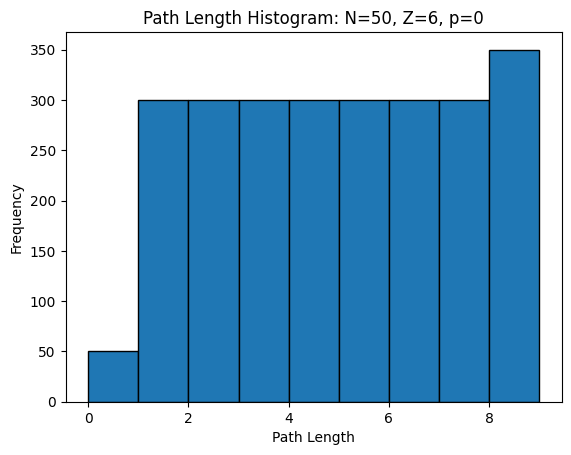

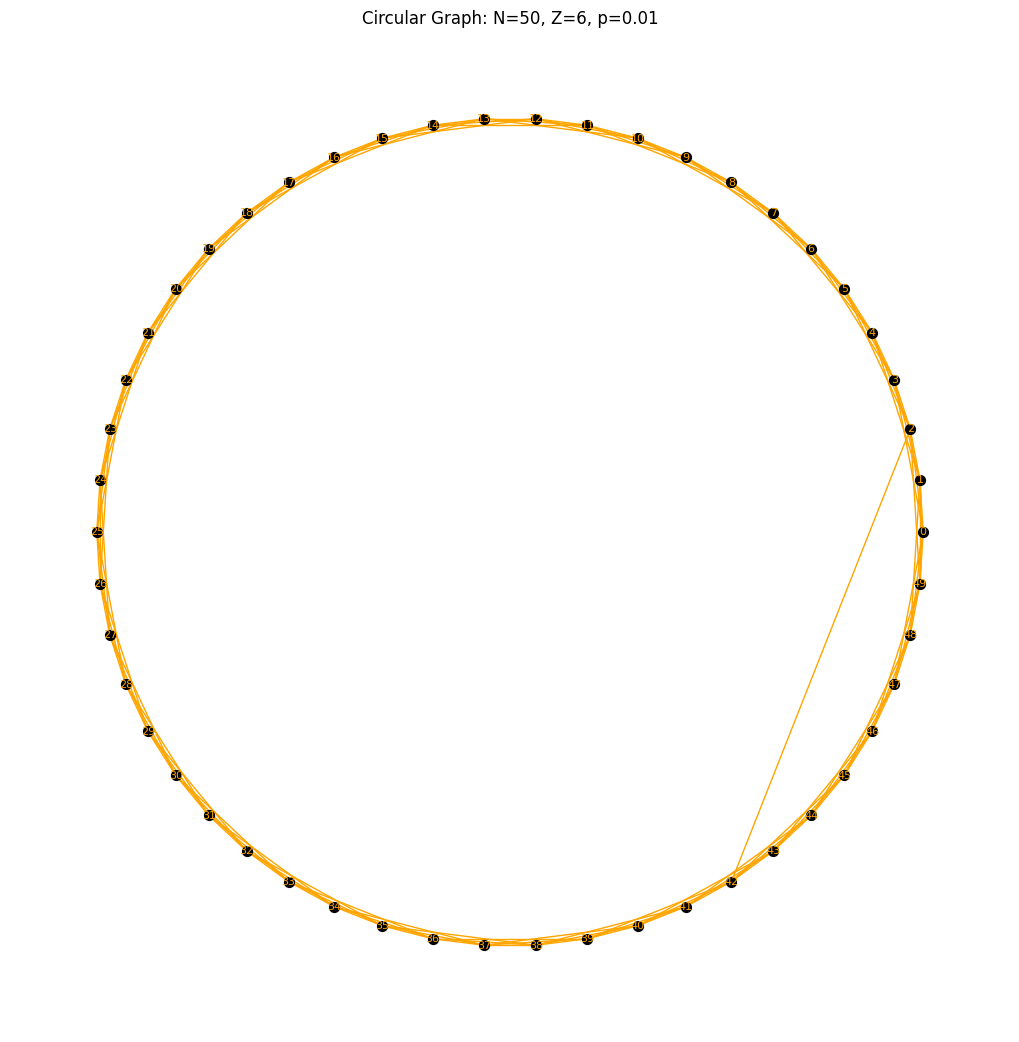

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 36548.48it/s]


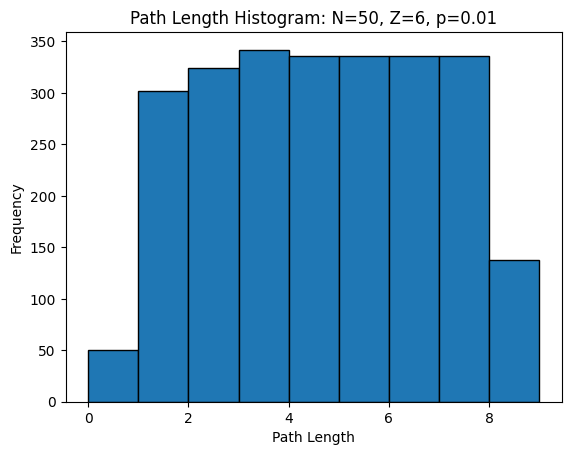

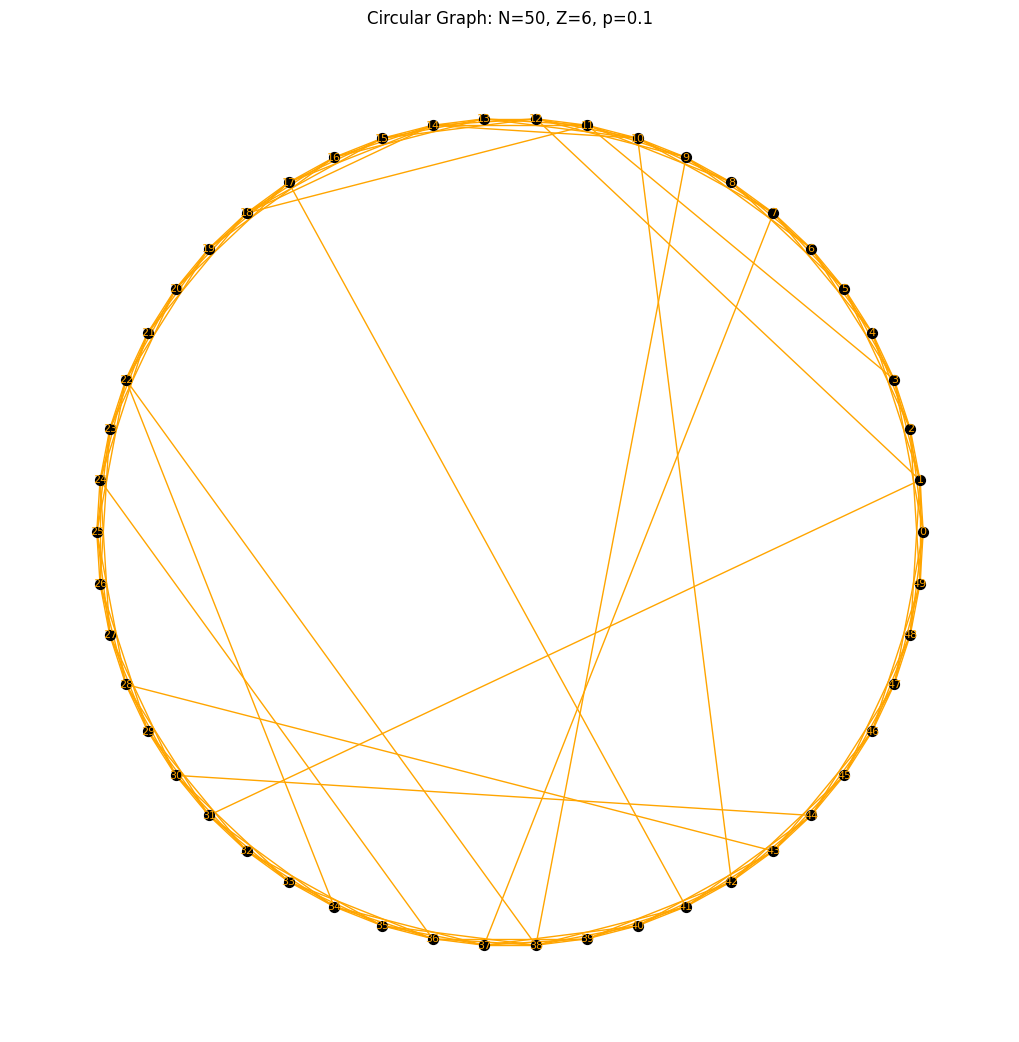

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 41258.15it/s]


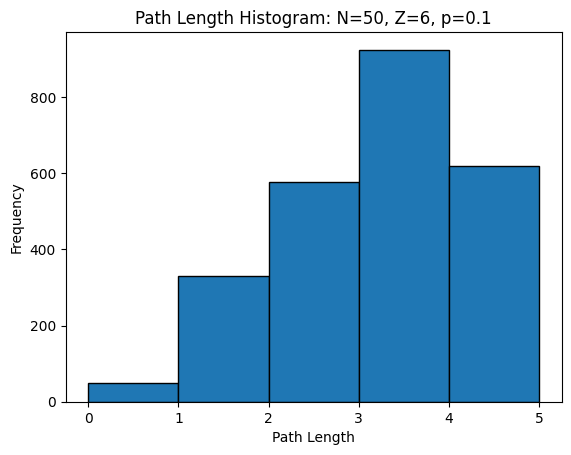

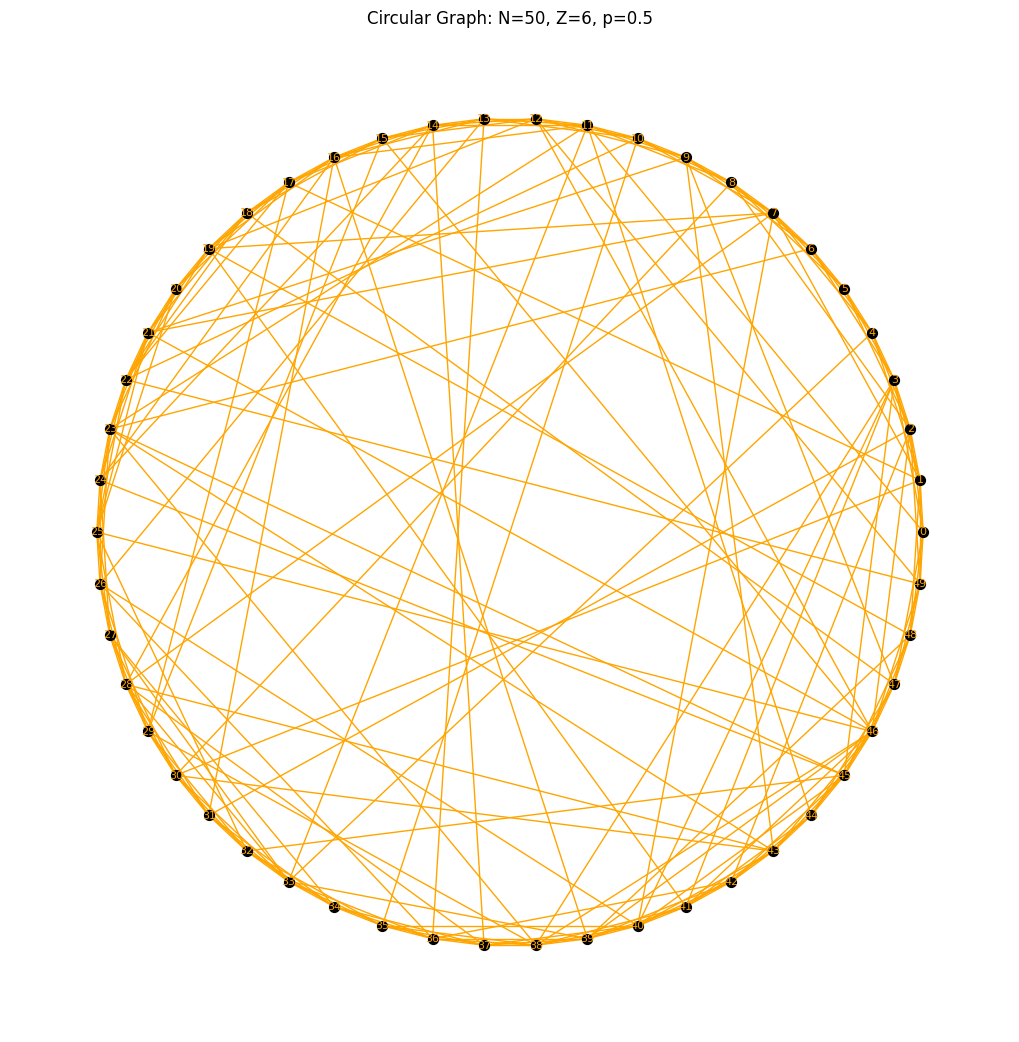

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 50/50 [00:00<00:00, 42956.82it/s]


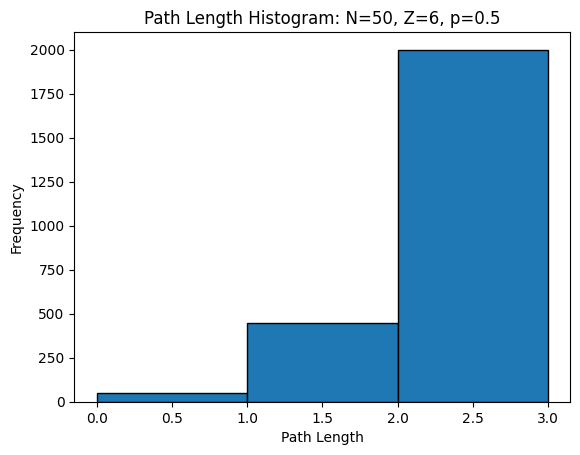

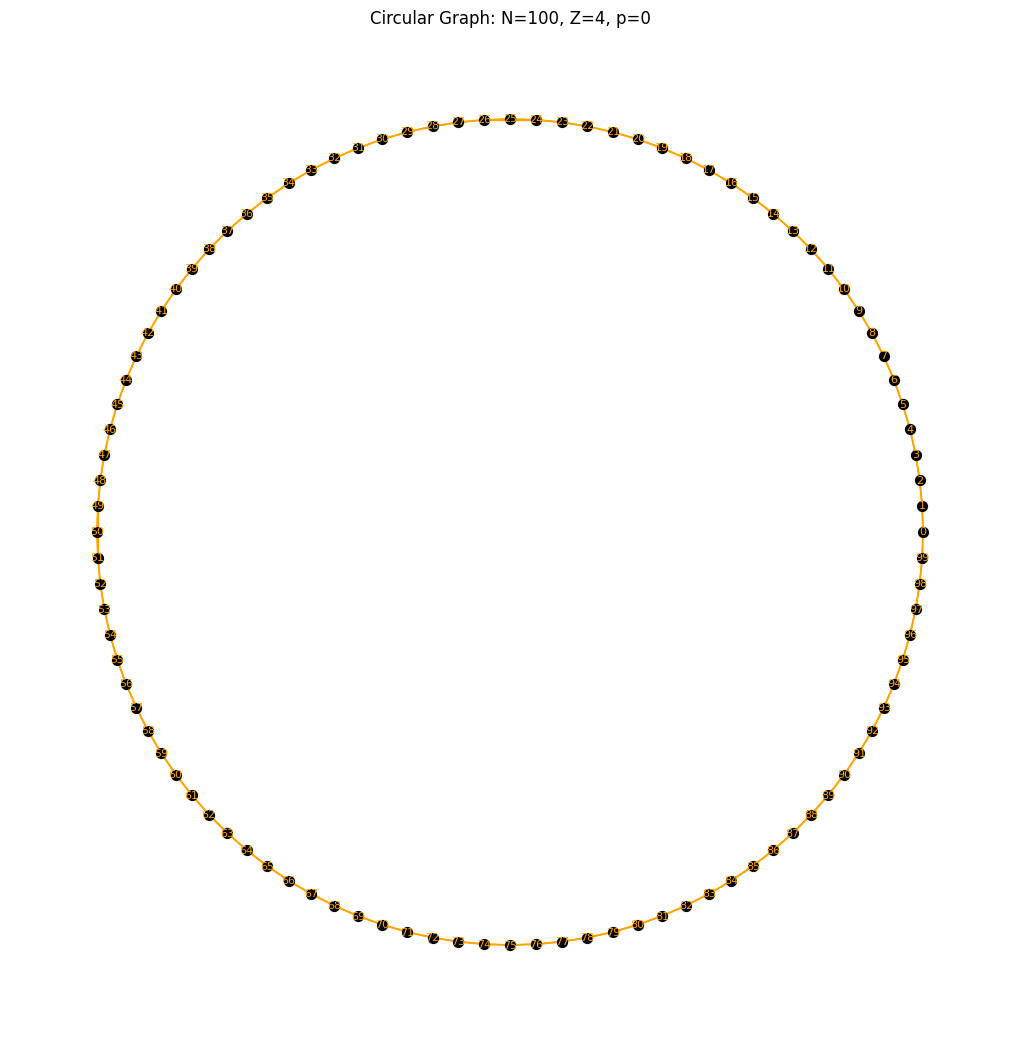

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 23640.54it/s]


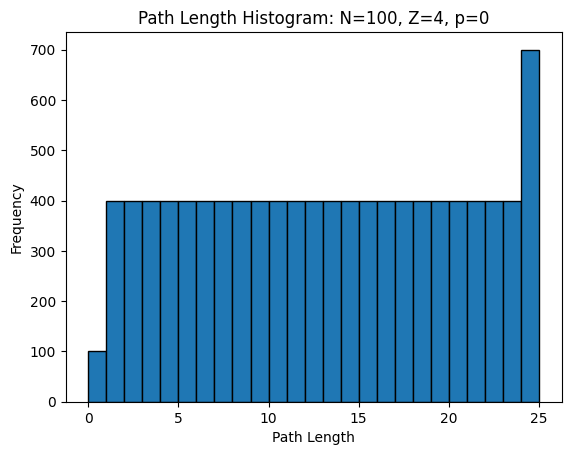

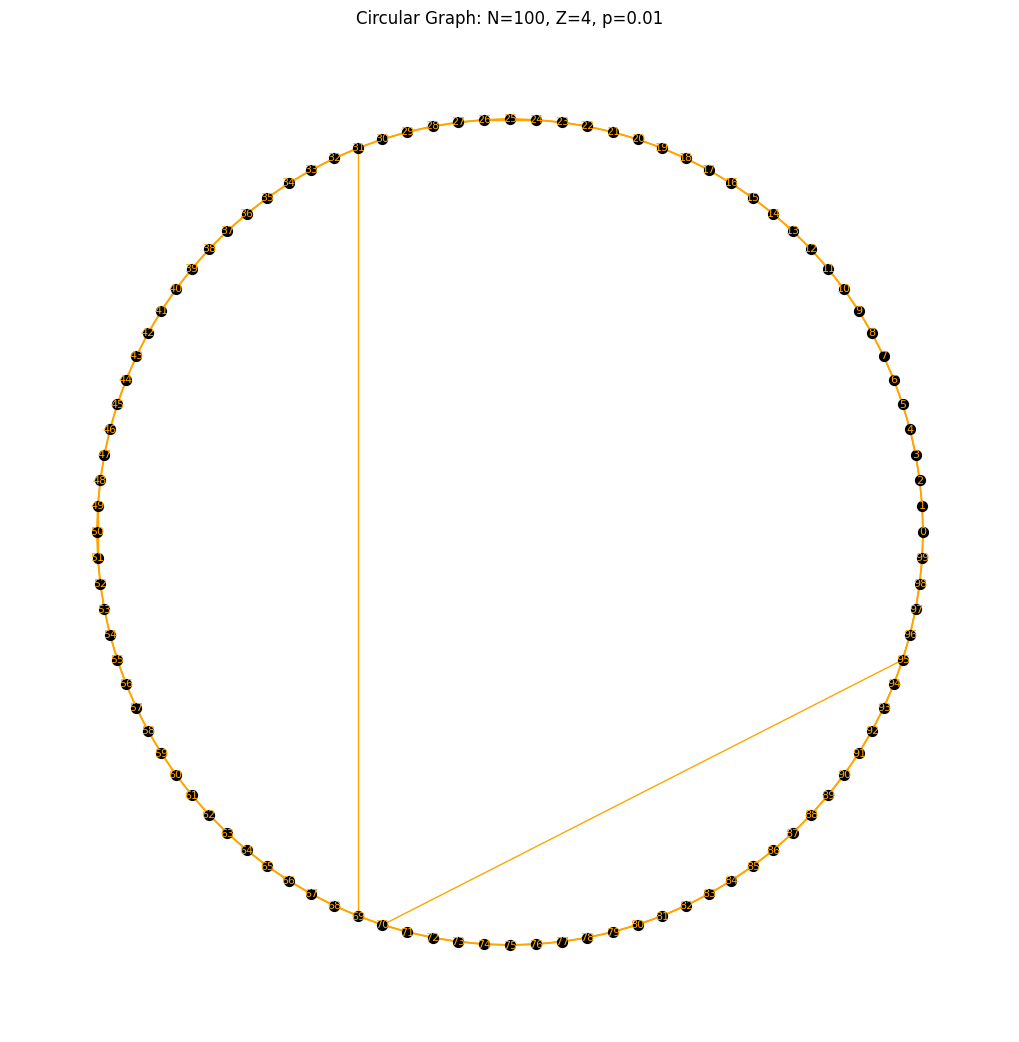

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 3367.46it/s]


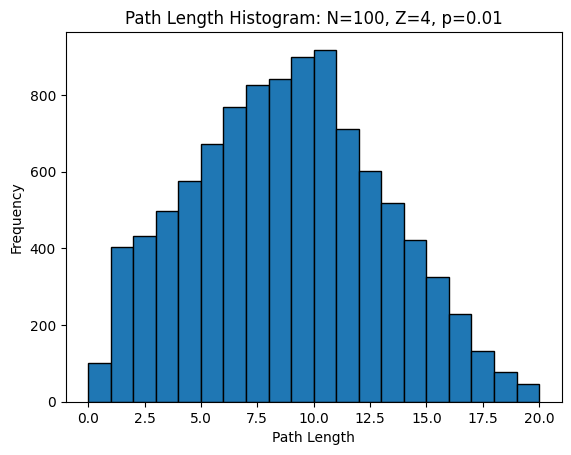

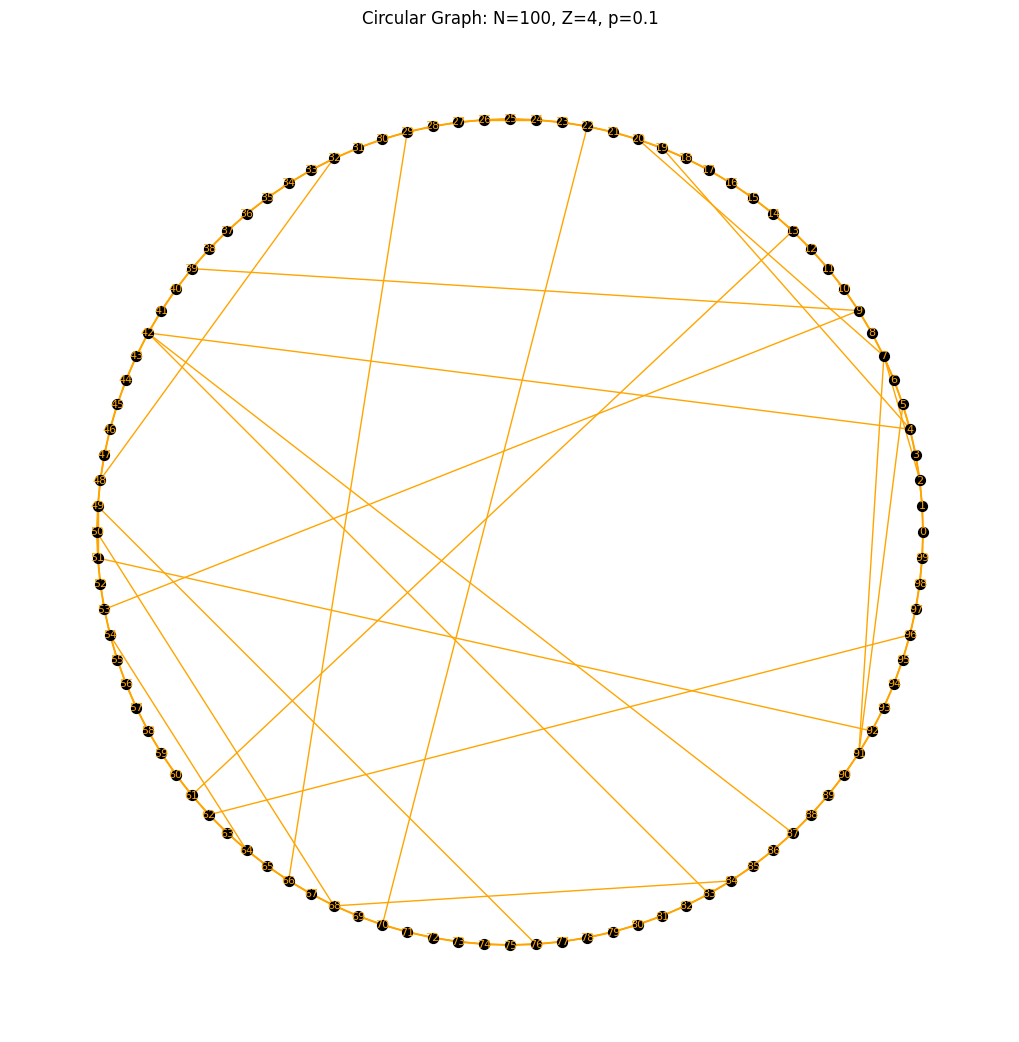

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 17848.10it/s]


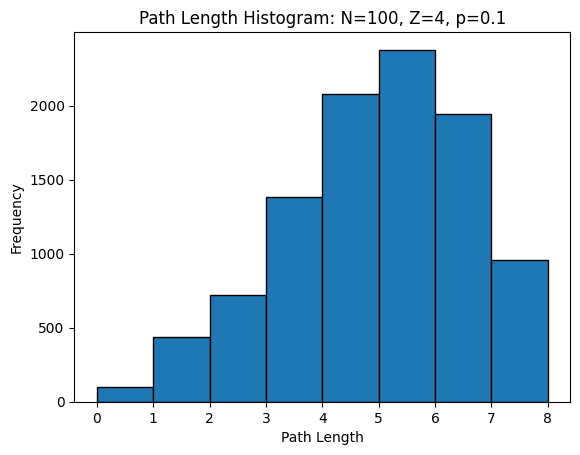

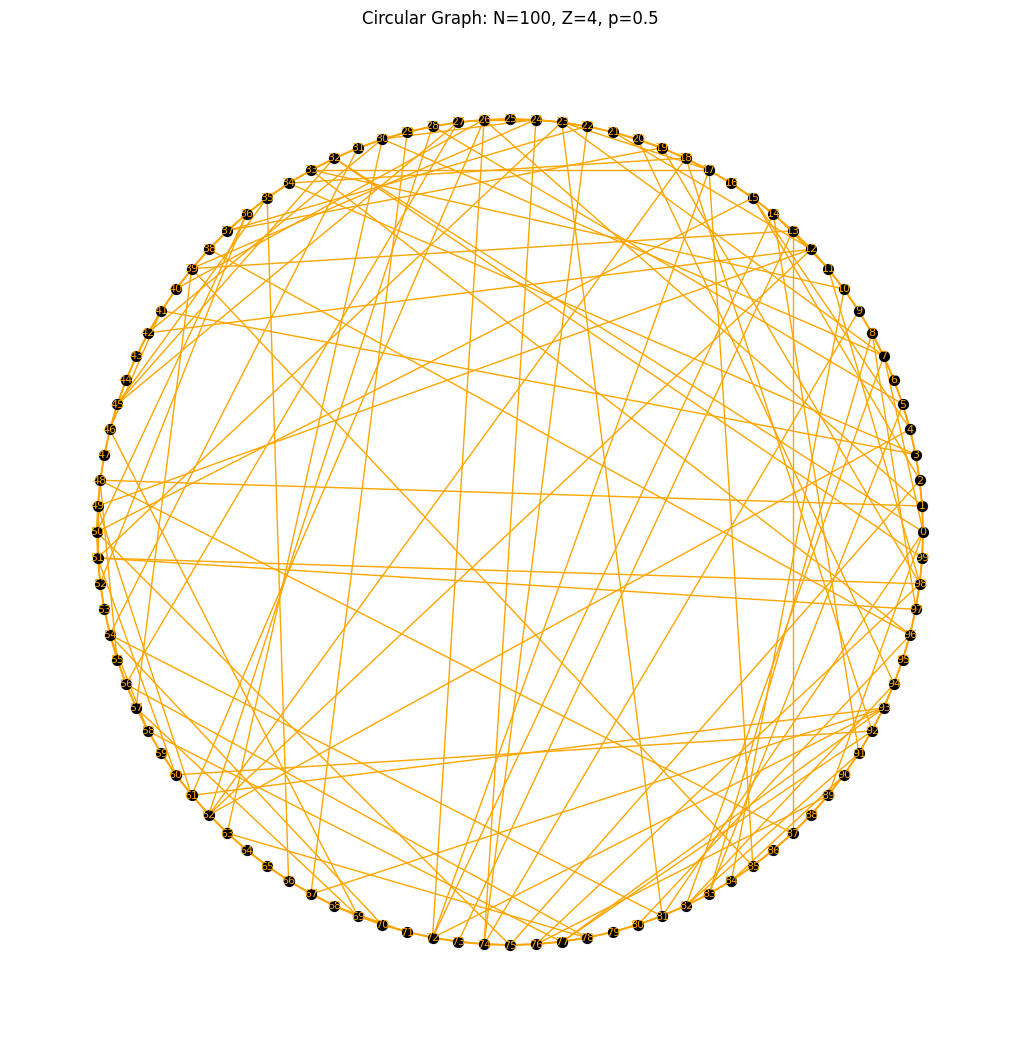

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 12400.75it/s]


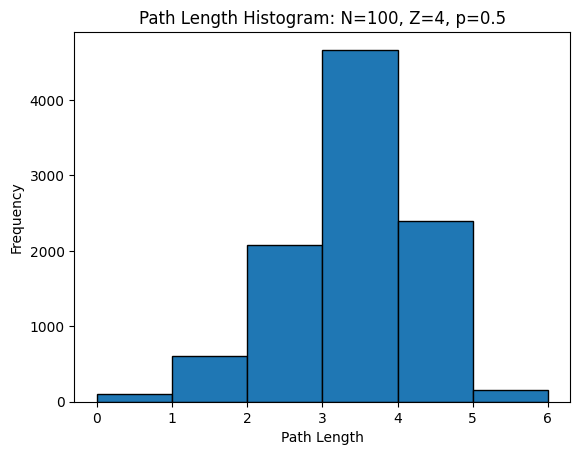

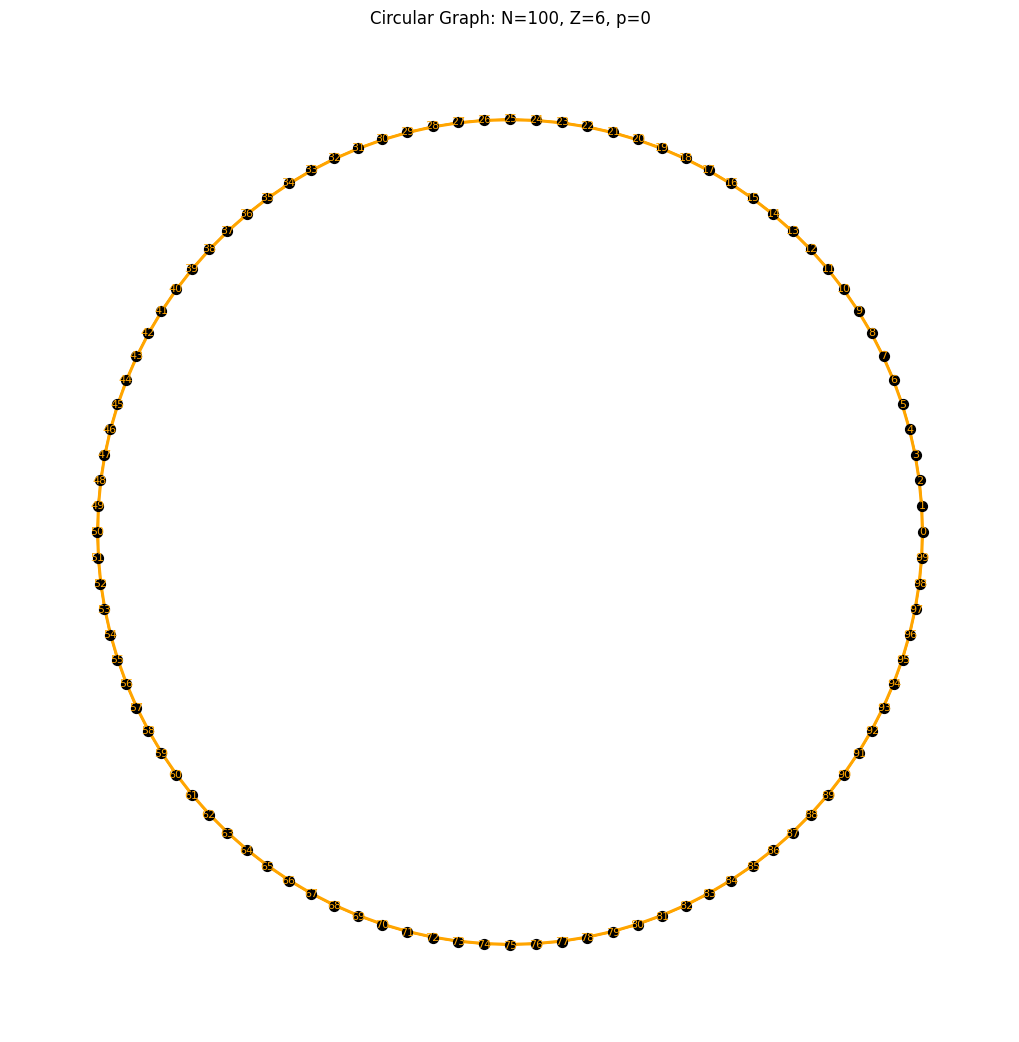

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 20600.71it/s]


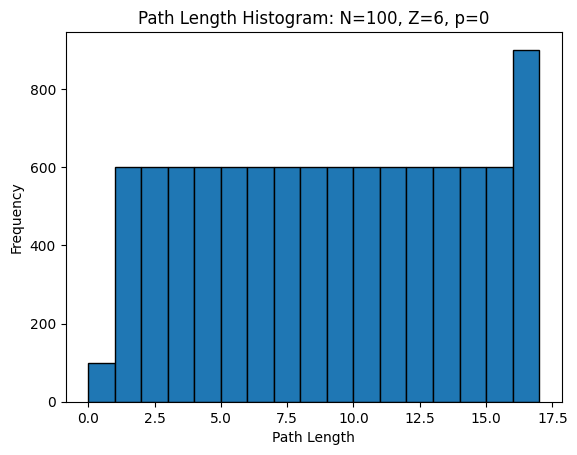

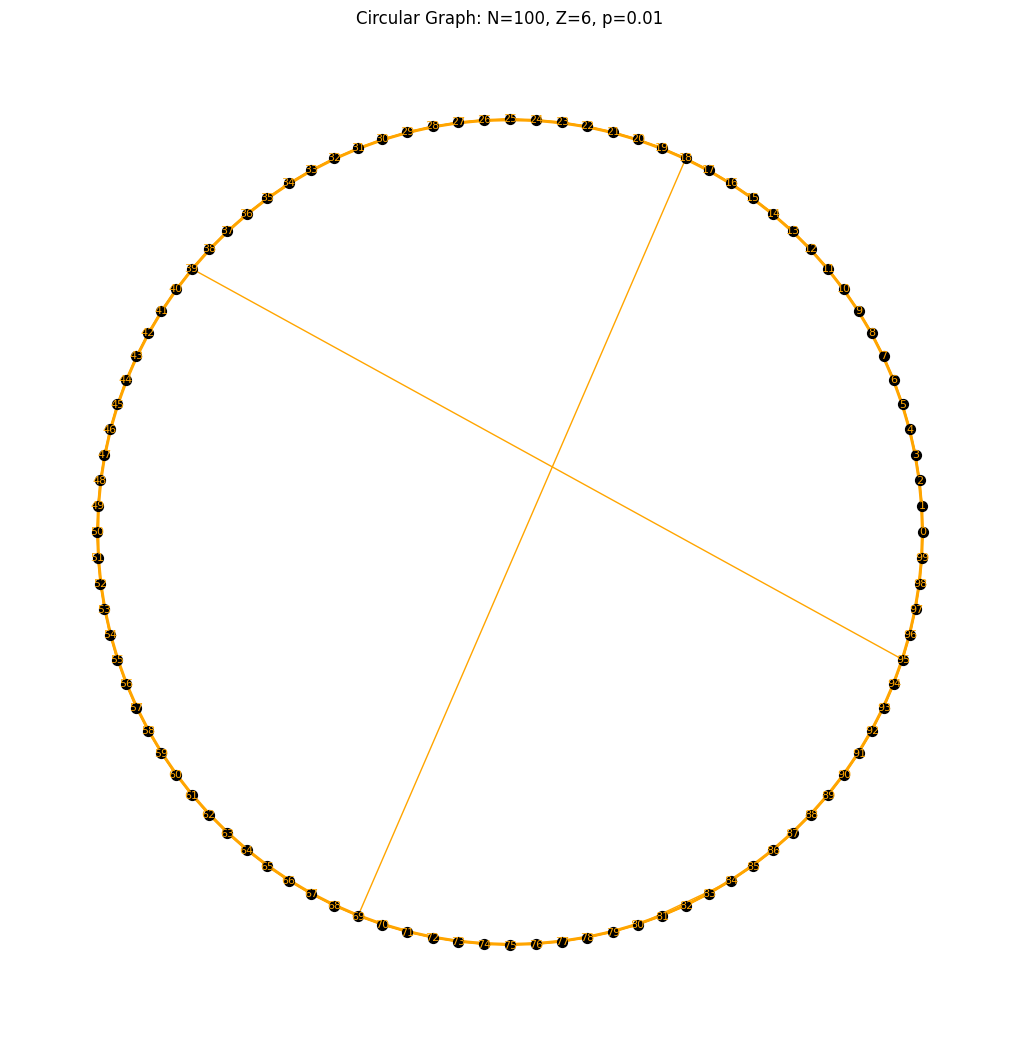

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 16108.40it/s]


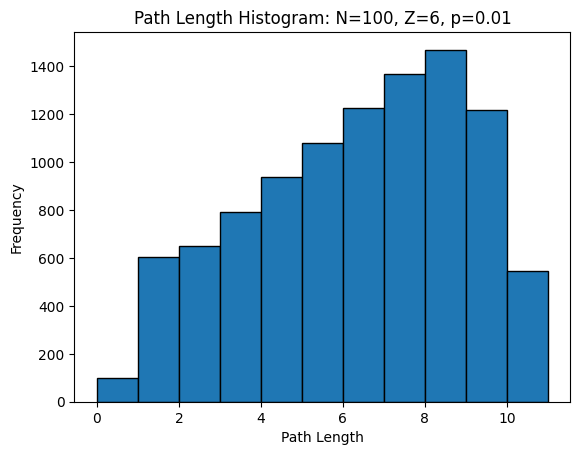

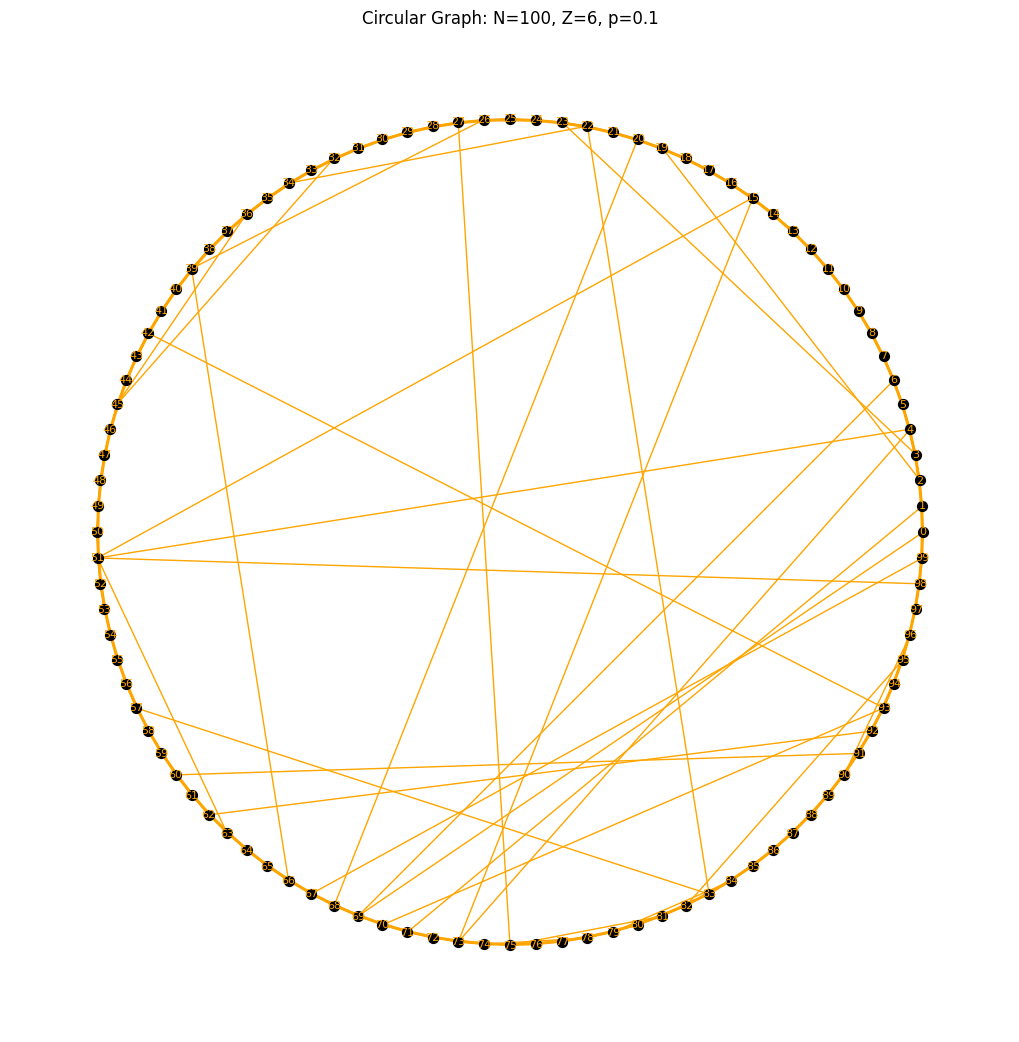

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 23153.76it/s]


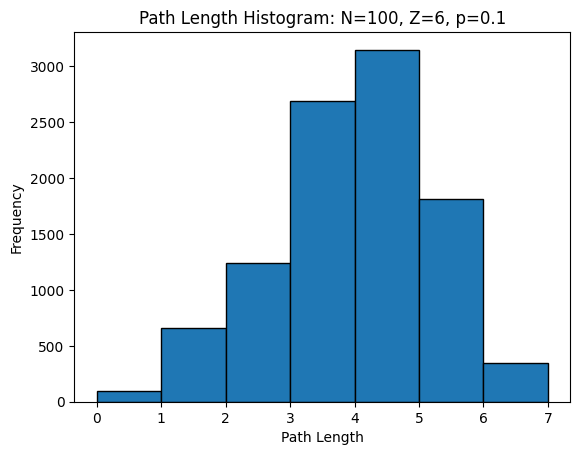

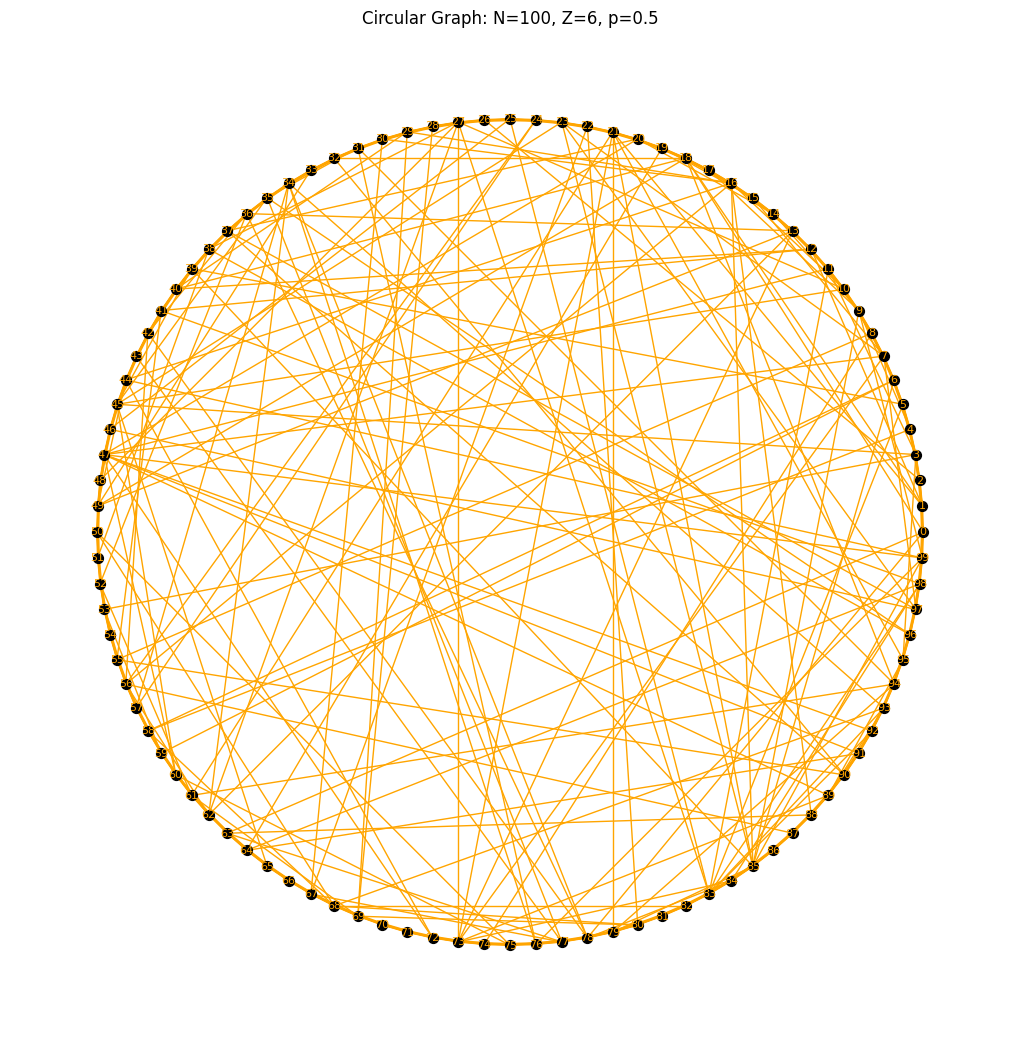

Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 100/100 [00:00<00:00, 24624.58it/s]


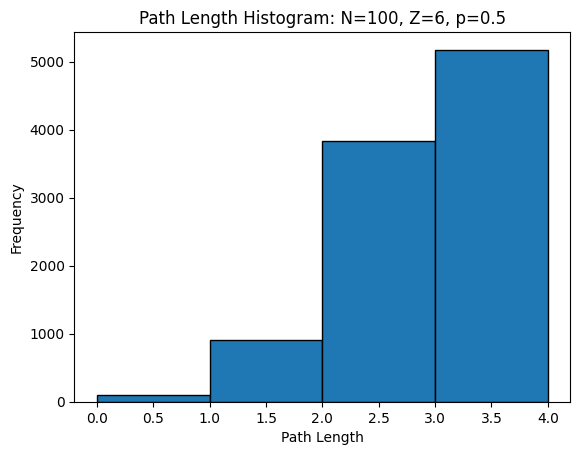

In [14]:
N_values = [50, 100]
Z_values = [4, 6]
p_values = [0, 0.01, 0.1, 0.5]

for N in N_values:
    for Z in Z_values:
        for p in p_values:
            G = small_world_network(N, Z, p)
            plt.figure(figsize=(10, 10))
            nx.draw_circular(
                G,
                with_labels=True,
                node_size=50,
                node_color='black',
                edge_color='orange',
                font_size=8,
                font_color='orange'
            )
            plt.title(f'Circular Graph: N={N}, Z={Z}, p={p}')
            plt.show()
            
            all_path_lengths = find_all_path_lengths(G)
            plt.hist(all_path_lengths, bins=range(max(all_path_lengths)+1), edgecolor='black')
            plt.xlabel('Path Length')
            plt.ylabel('Frequency')
            plt.title(f'Path Length Histogram: N={N}, Z={Z}, p={p}')
            plt.show()

### Comparando com o modelo de Watts e Strogatz

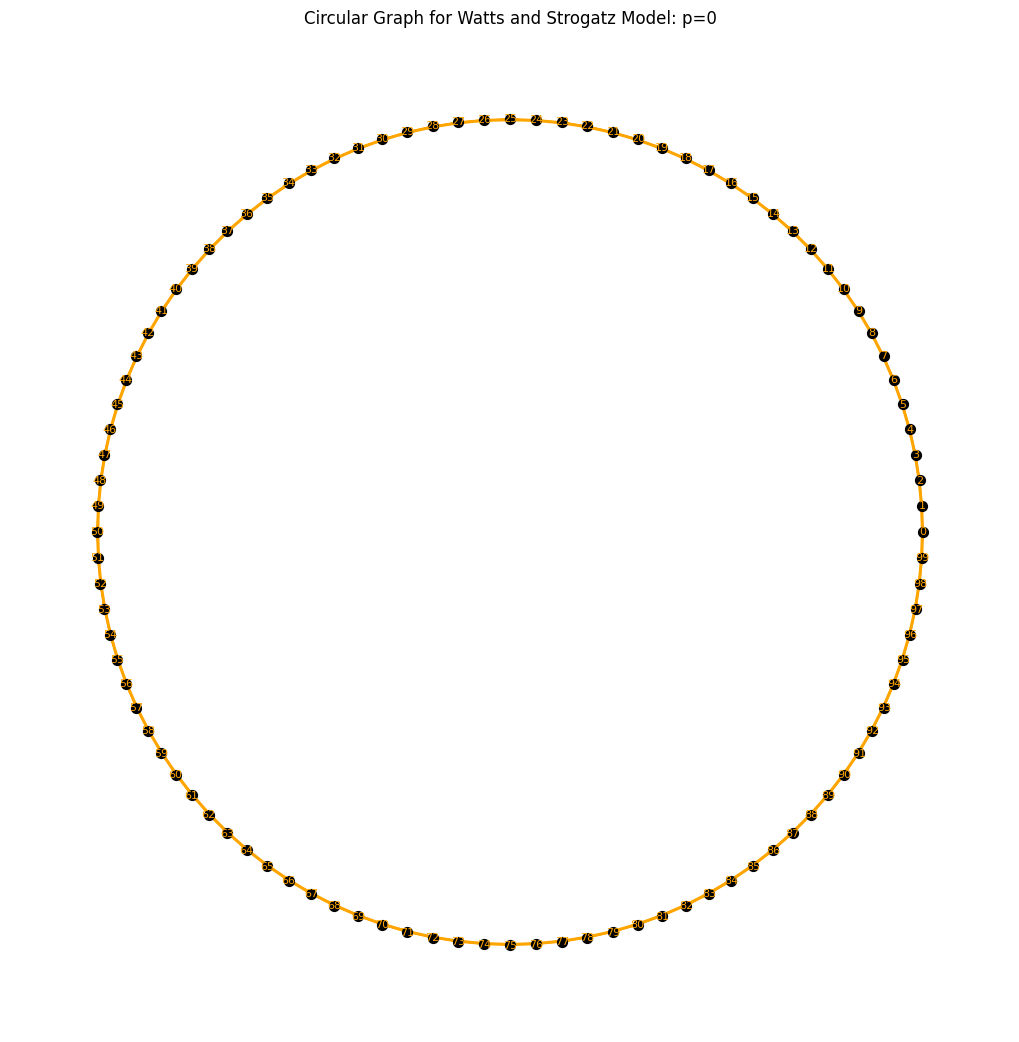

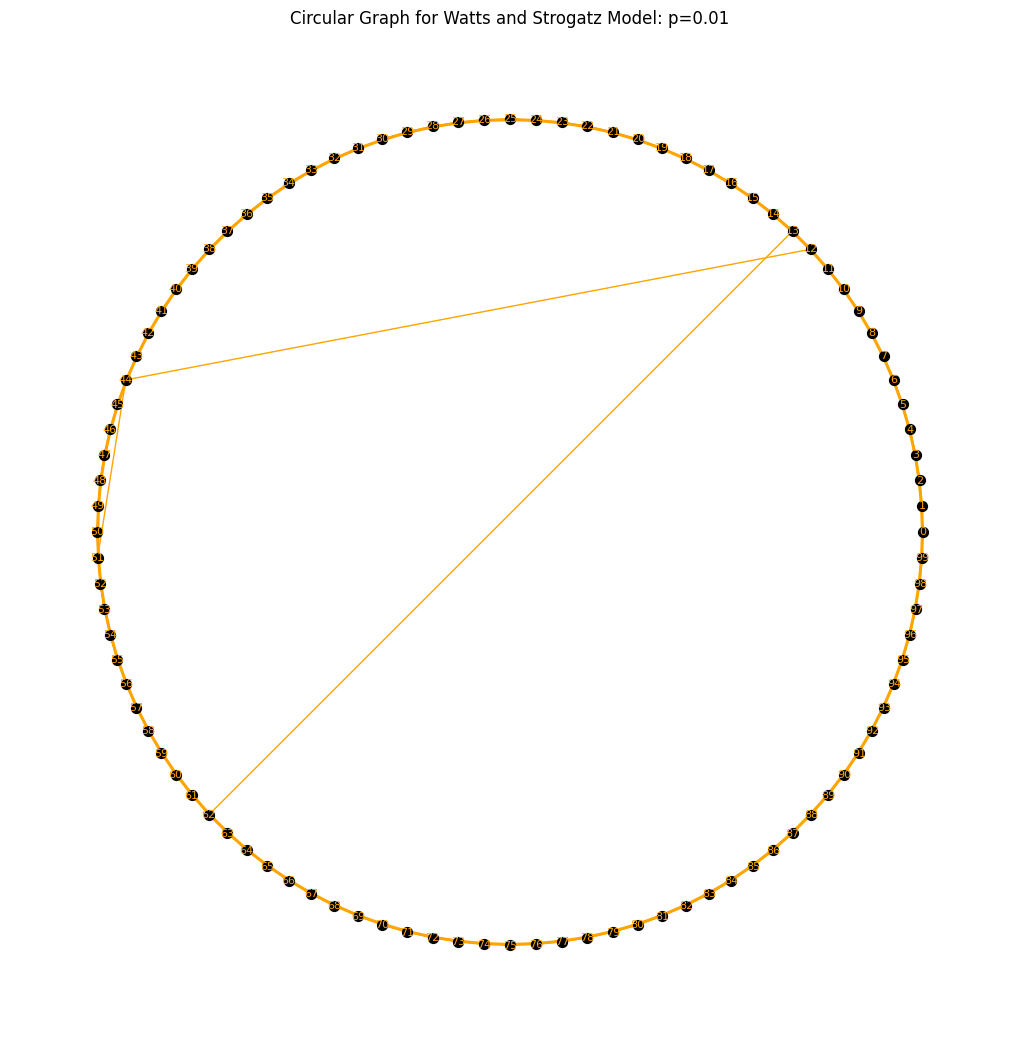

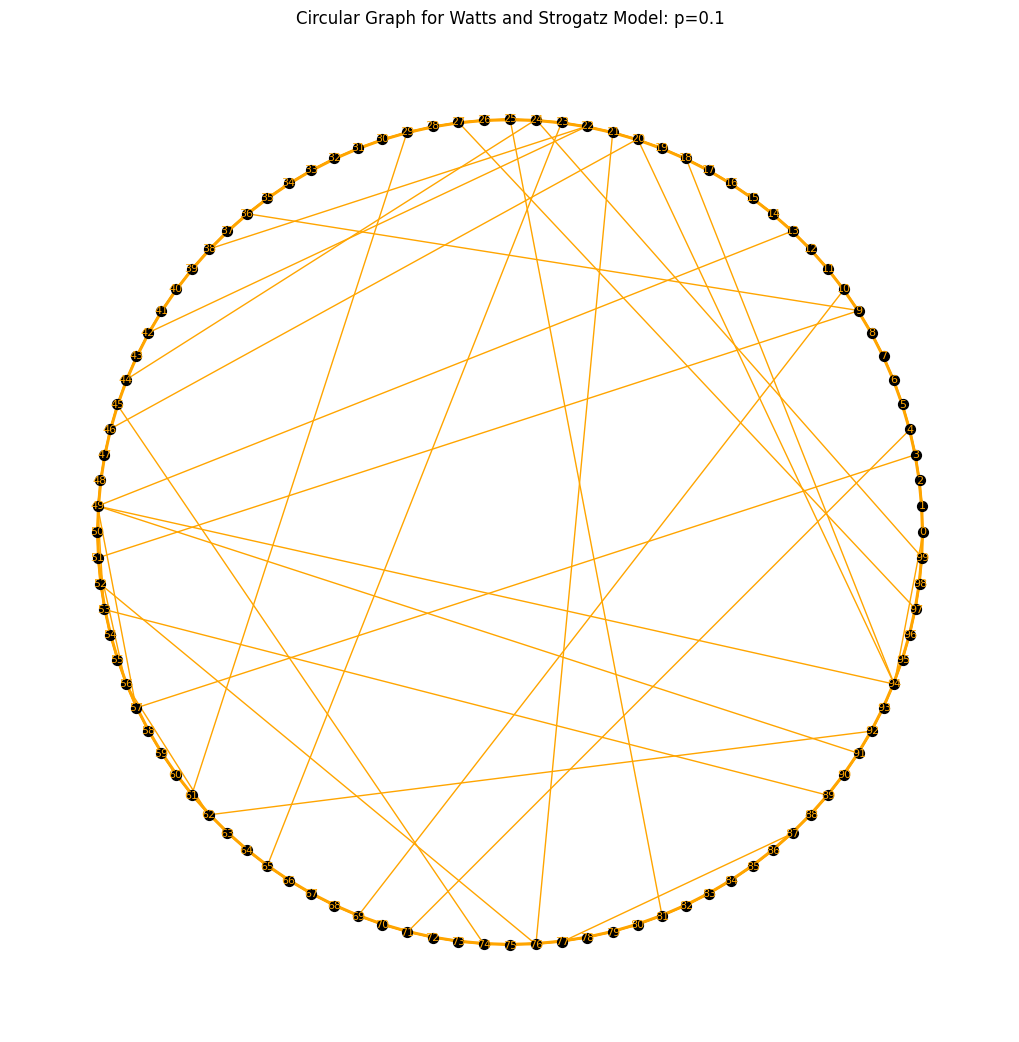

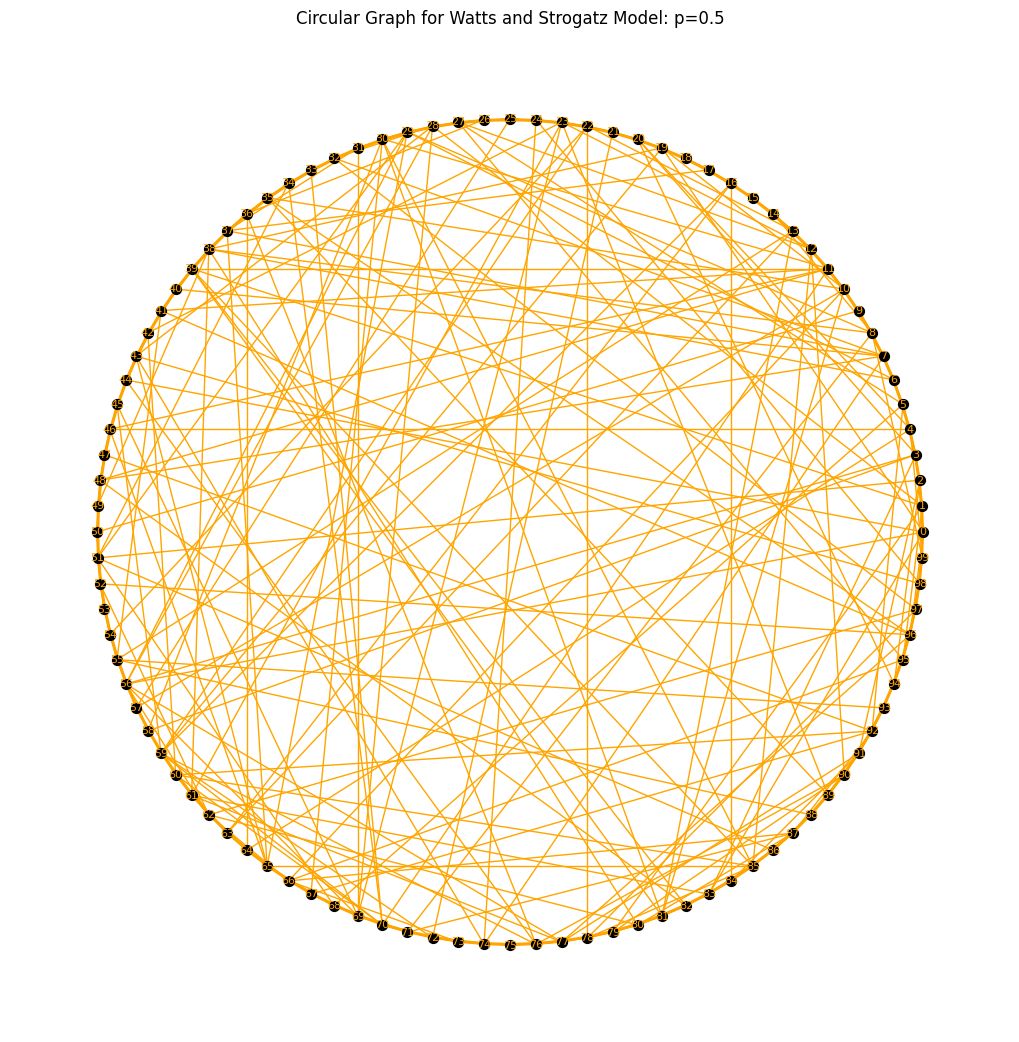

p=0, Average Path Length=8.757575757575758, Clustering Coefficient=0.600000000000001
p=0.01, Average Path Length=6.46989898989899, Clustering Coefficient=0.5913333333333343
p=0.1, Average Path Length=3.4254545454545453, Clustering Coefficient=0.5157460317460323
p=0.5, Average Path Length=2.451919191919192, Clustering Coefficient=0.3197812187812189


In [15]:
p_values = [0, 0.01, 0.1, 0.5]

for p in p_values:
    G = small_world_network(N, Z, p)
    plt.figure(figsize=(10, 10))
    nx.draw_circular(
        G,
        with_labels=True,
        node_size=50,
        node_color='black',
        edge_color='orange',
        font_size=8,
        font_color='orange'
    )
    plt.title(f'Circular Graph for Watts and Strogatz Model: p={p}')
    plt.show()

# Statistical comparison can be done through metrics like average path length and clustering coefficient
for p in p_values:
    G = small_world_network(N, Z, p)
    avg_path_length = find_average_path_length(G)
    clustering_coefficient = nx.average_clustering(G)
    print(f'p={p}, Average Path Length={avg_path_length}, Clustering Coefficient={clustering_coefficient}')


Calculating average path lengths for different p values: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


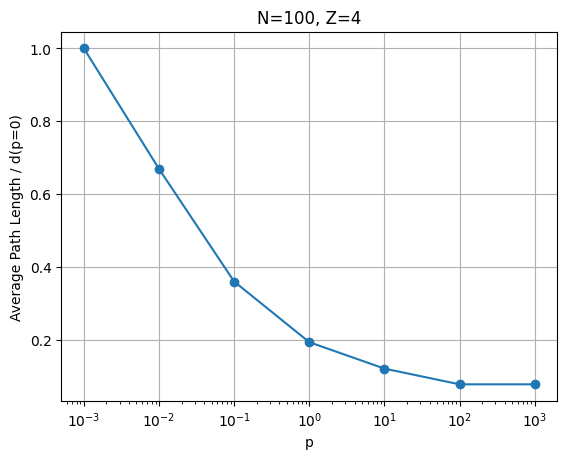

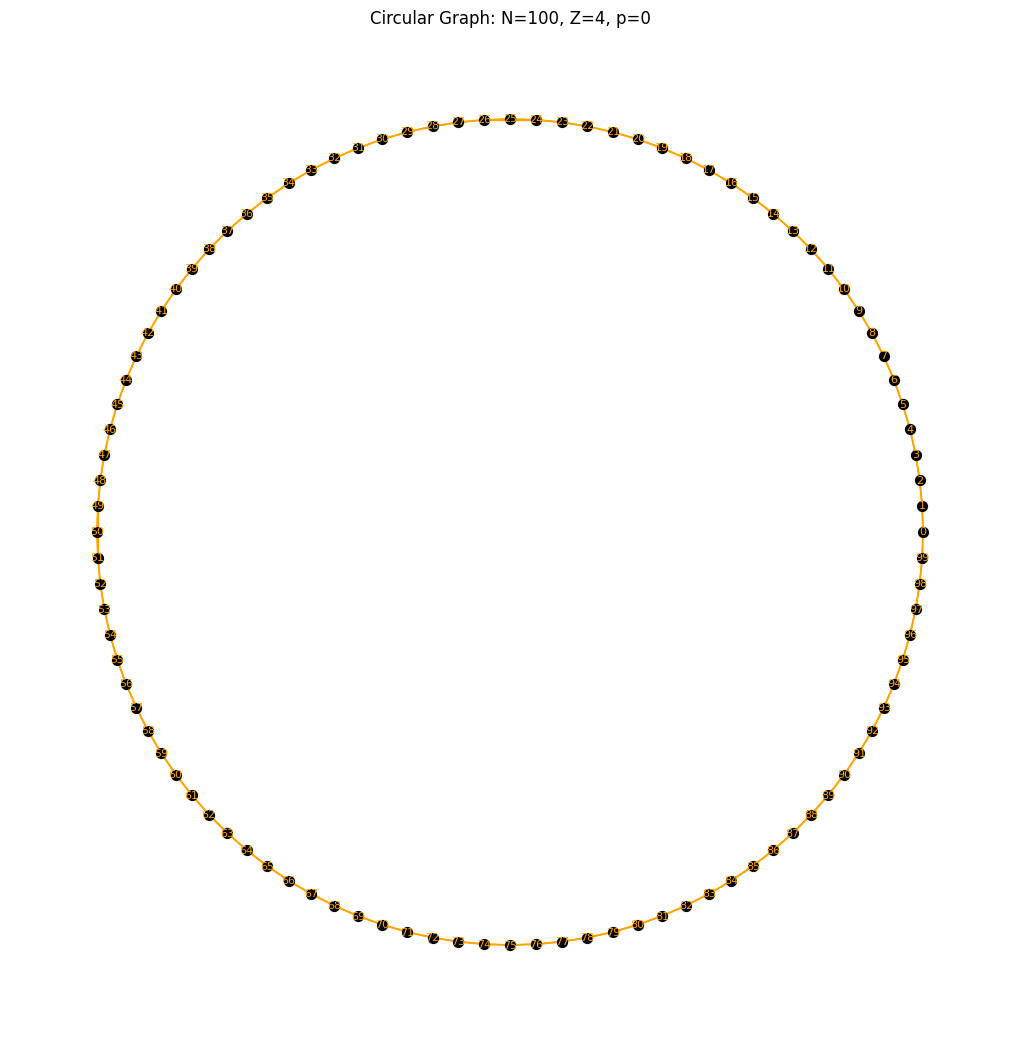

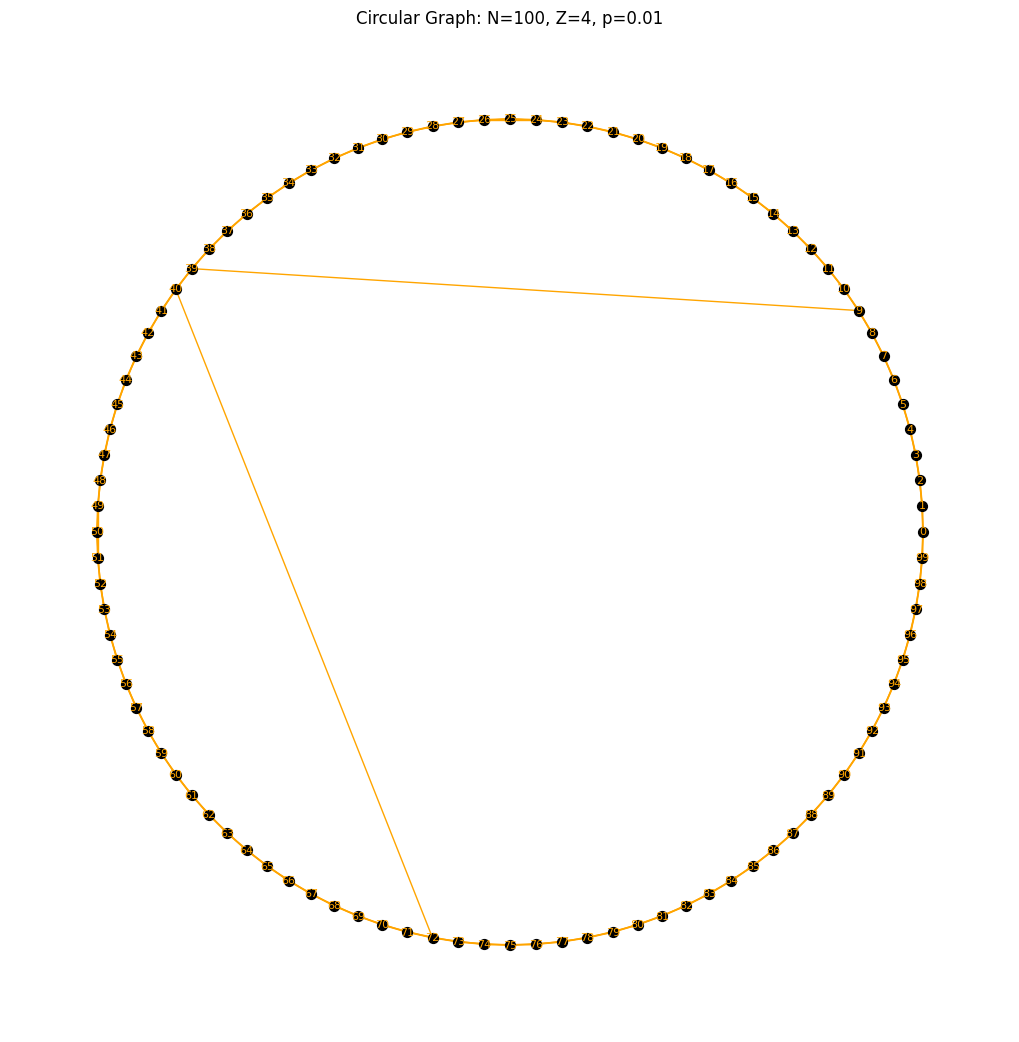

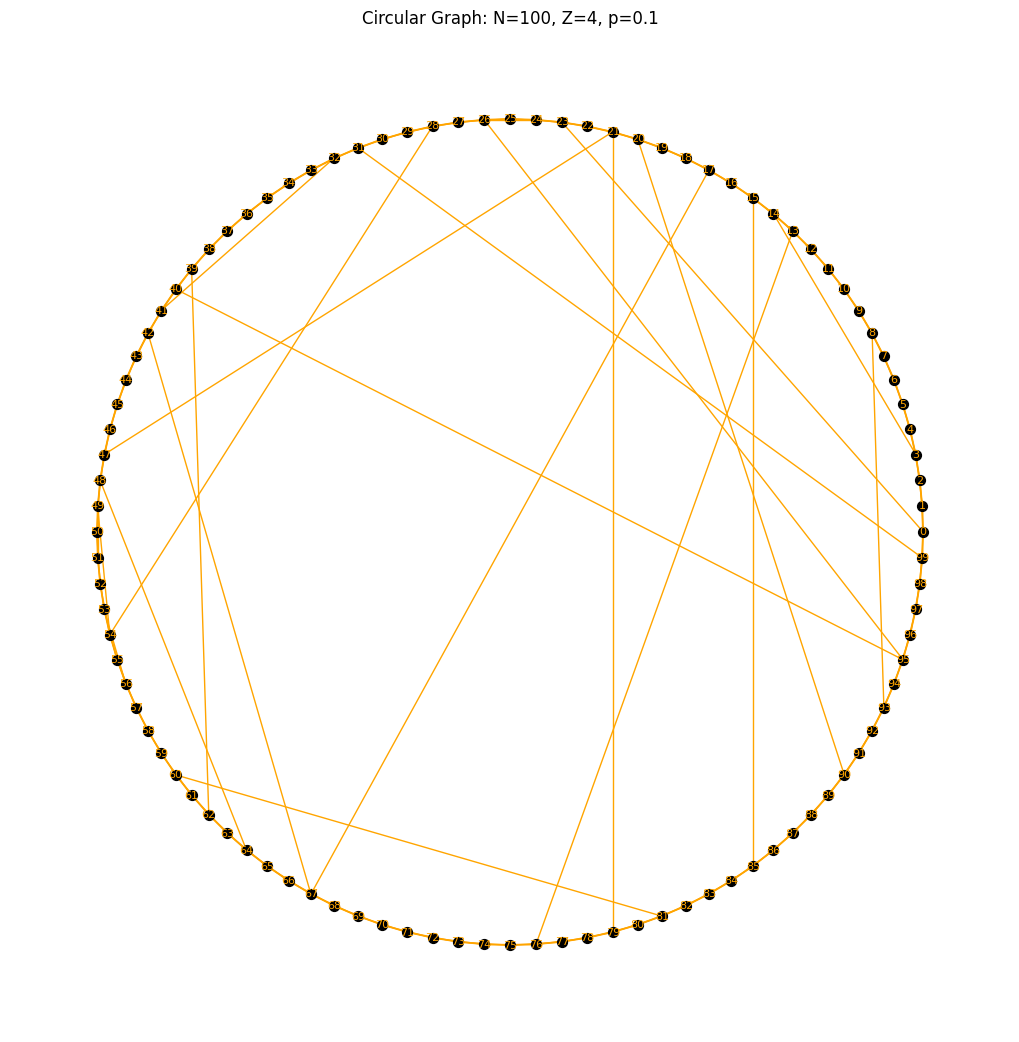

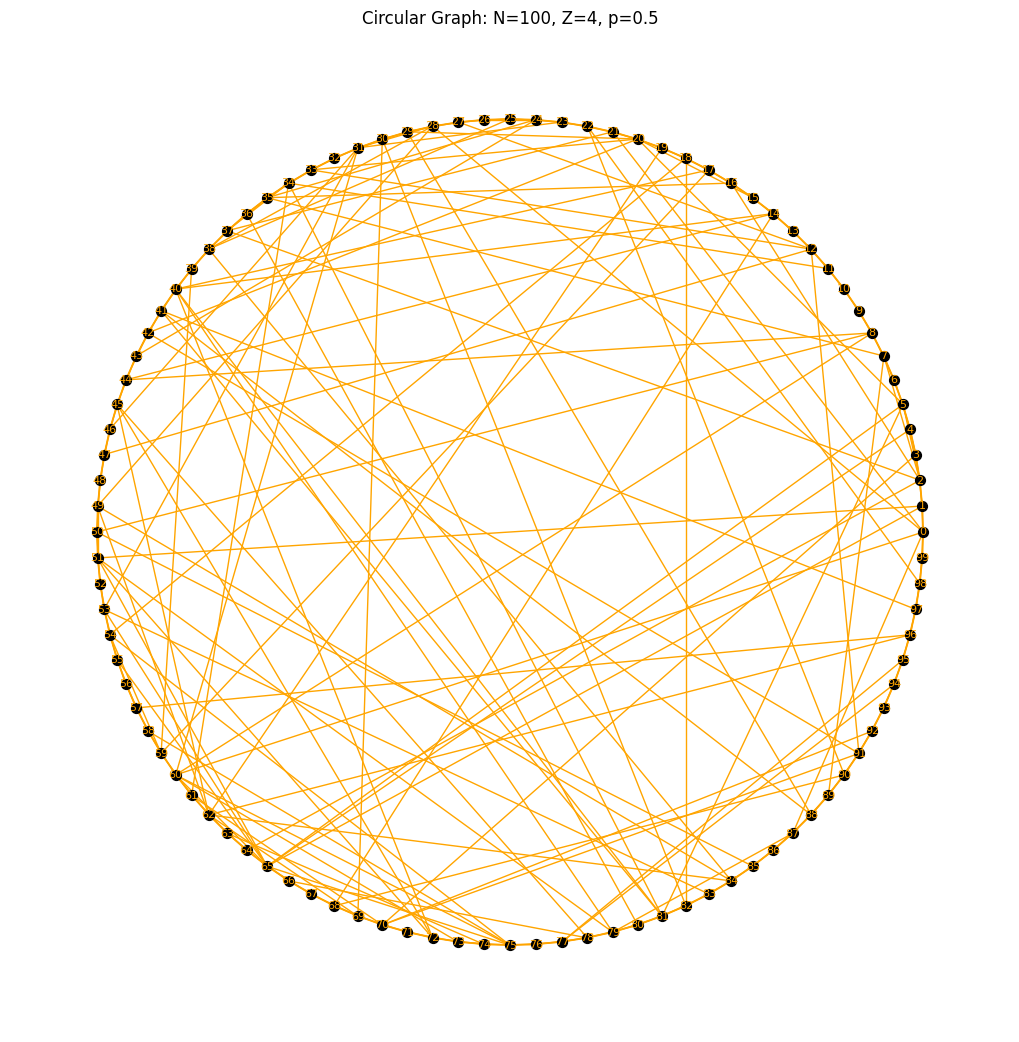

In [16]:
# Comprimento médio do caminho dividido por d(p=0) em função de p (gráfico semi-log).
plot_average_path_length_vs_p(100, 4)

N = 100
Z = 4
p_values = [0, 0.01, 0.1, 0.5]

for p in p_values:
    G = small_world_network(N, Z, p)
    plt.figure(figsize=(10, 10))
    nx.draw_circular(
        G,
        with_labels=True,
        node_size=50,
        node_color='black',
        edge_color='orange',
        font_size=8,
        font_color='orange'
    )
    plt.title(f'Circular Graph: N={N}, Z={Z}, p={p}')
    plt.show()

In [17]:
def average_link_length_vs_shortcuts(N, Z):
    p_values = [10**i for i in range(-3, 4)]
    avg_link_lengths = []
    num_shortcuts = []

    for p in tqdm(p_values, desc="Calculating average link lengths for different p values"):
        G = small_world_network(N, Z, p)
        avg_length = find_average_path_length(G)
        avg_link_lengths.append(avg_length)
        num_shortcuts.append(p * N * Z // 2)

    plt.plot(num_shortcuts, avg_link_lengths, marker='o')
    plt.xlabel('Number of Shortcuts')
    plt.ylabel('Average Link Length')
    plt.title(f'Average Link Length vs Number of Shortcuts (N={N}, Z={Z})')
    plt.grid(True)
    plt.show()

Calculating average link lengths for different p values: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


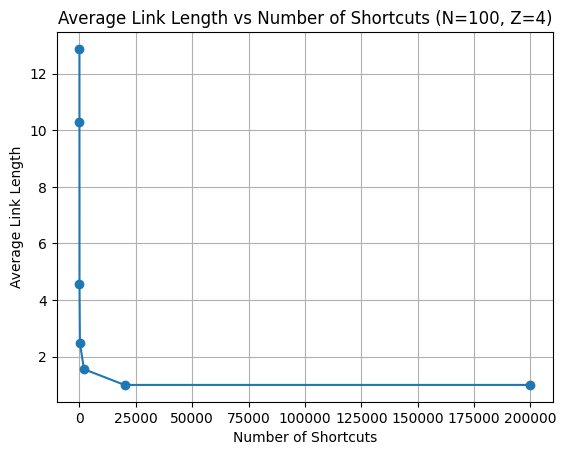

In [18]:
average_link_length_vs_shortcuts(100, 4)

Average path length of the real network: 2.408199643493761


Calculando os comprimentos dos caminhos a partir de cada nó: 100%|██████████| 34/34 [00:00<00:00, 27912.77it/s]


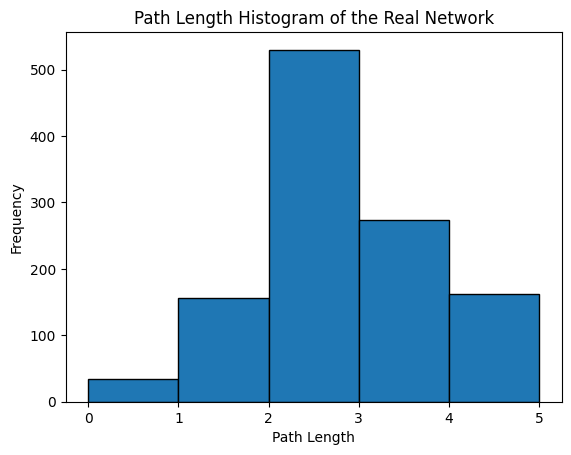

In [19]:
real_network = nx.karate_club_graph()

# Cálculo da distância média e histograma das distâncias entre os nós da rede real.
real_avg_path_length = find_average_path_length(real_network)
print(f'Average path length of the real network: {real_avg_path_length}')

real_path_lengths = find_all_path_lengths(real_network)
plt.hist(real_path_lengths, bins=range(max(real_path_lengths)+1), edgecolor='black')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Path Length Histogram of the Real Network')
plt.show()

## 8. Discussão e Conclusões

### Discussão dos Resultados:
Os resultados dos experimentos mostram que, à medida que o valor de \( p \) aumenta, o comprimento médio do caminho diminui. Isso é esperado, pois a introdução de atalhos torna a rede mais conectada.

### Comparação entre os Modelos Teóricos e a Rede Real:
A rede real que analisei (rede de colaboração científica dos físicos) apresenta um comprimento médio de caminho menor comparado ao modelo de Watts e Strogatz com \( p=0 \), indicando que a rede real possui características de 'mundo pequeno'.

### Reflexão sobre a Aplicabilidade dos Conceitos de Redes de Mundo Pequeno em Situações Reais:
Os conceitos de redes de mundo pequeno são aplicáveis em várias situações reais, como redes sociais, redes de colaboração científica e redes de comunicação. Essas redes geralmente exibem um pequeno comprimento médio de caminho e um alto coeficiente de agrupamento, facilitando a transmissão de informações.